# ***Improving Employee Retention by Predicting Employee Attrition Using Machine Learning***


"Human resources (HR) are the main assets that need to be well-managed by a company to achieve business objectives effectively and efficiently. On this occasion, we will face a problem regarding the human resources within the company. Our focus is to find out how to retain employees in the current company to avoid the increased costs of employee recruitment and training for new hires. By identifying the main factors that cause employees to feel dissatisfied, the company can immediately address them by creating programs relevant to employee issues."

This data set contains the following features:

0. `Username`: Employee's unique identifier.
1. `EnterpriseID`: Company's assigned ID for the employee.
2. `StatusPernikahan`: Marital status.
3. `JenisKelamin`: Gender.
4. `StatusKepegawaian`: Employment status.
5. `Pekerjaan`: Job title.
6. `JenjangKarir`: Career level.
7. `PerformancePegawai`: Performance rating.
8. `AsalDaerah`: Employee's region of origin.
9. `HiringPlatform`: Platform used for hiring.
10. `SkorSurveyEngagement`: Engagement survey score.
11. `SkorKepuasanPegawai`: Job satisfaction score.
12. `JumlahKeikutsertaanProjek`: Number of project participations.
13. `JumlahKeterlambatanSebulanTerakhir`: Number of recent month delays.
14. `JumlahKetidakhadiran`: Number of absences.
15. `NomorHP`: Phone number.
16. `Email`: Email address.
17. `TingkatPendidikan`: Education level.
18. `PernahBekerja`: Previous work experience.
19. `IkutProgramLOP`: Participation in the LOP program.
20. `AlasanResign`: Reason for resignation.
21. `TanggalLahir`: Date of birth.
22. `TanggalHiring`: Hiring date.
23. `TanggalPenilaianKaryawan`: Last evaluation date.
24. `TanggalResign`: Resignation date.







### Import Library

In [ ]:
!pip install ppscore

In [ ]:
!pip install shap

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import ppscore as pps
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek
import shap
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.25.2
pandas version :  1.5.3
seaborn version :  0.13.1


### Load Dataset

In [ ]:
df = pd.read_csv('hr_data.csv')
pd.set_option('display.max_columns', None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

## Task 1 - Data Preprocessing
Work Stage:

1. Handle Missing Values and duplicate values.
2. Drop unnecessary/incorrect values
4. Check Statistical summary of categorical and numerical features.

In [ ]:
chadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [ ]:
df.head(4)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,01/07/1972,10/01/2011,15/02/2016,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,26/04/1984,06/01/2014,17/01/2020,16/06/2018
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,07/01/1974,10/01/2011,10/01/2016,24/09/2014
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,24/11/1979,17/02/2014,04/02/2020,-


Data Overview Definitions:

*   Total Entries: The number of records or rows in the dataset, which is 287.
*   Total Columns: The number of attributes or features in the dataset, which is 25
*   `IkutProgramLOP`: Column with significant missing values (258 missing).
*   `AlasanResign`: Column with notable missing values (66 missing).
*   Other Columns: Columns with fewer missing values that might need different handling.








#### Check Missing Values

Number of missing values per column:


SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
IkutProgramLOP                        258
AlasanResign                           66
dtype: int64


Percentage of missing values per column:
Username                               0.000000
EnterpriseID                           0.000000
StatusPernikahan                       0.000000
JenisKelamin                           0.000000
StatusKepegawaian                      0.000000
Pekerjaan                              0.000000
JenjangKarir                           0.000000
PerformancePegawai                     0.000000
AsalDaerah                             0.000000
HiringPlatform                         0.000000
SkorSurveyEngagement                   0.000000
SkorKepuasanPegawai                    1.742160
JumlahKeikutsertaanProjek              1.045296
JumlahKeterlambatanSebulanTerakhir     0.348432
JumlahKetidakhadiran                   2.090592
NomorHP                                0.000000
Email                                  0.000000
TingkatPendidikan                      0.000000
PernahBekerja                          0.000000
IkutProgramLOP                        89.89547

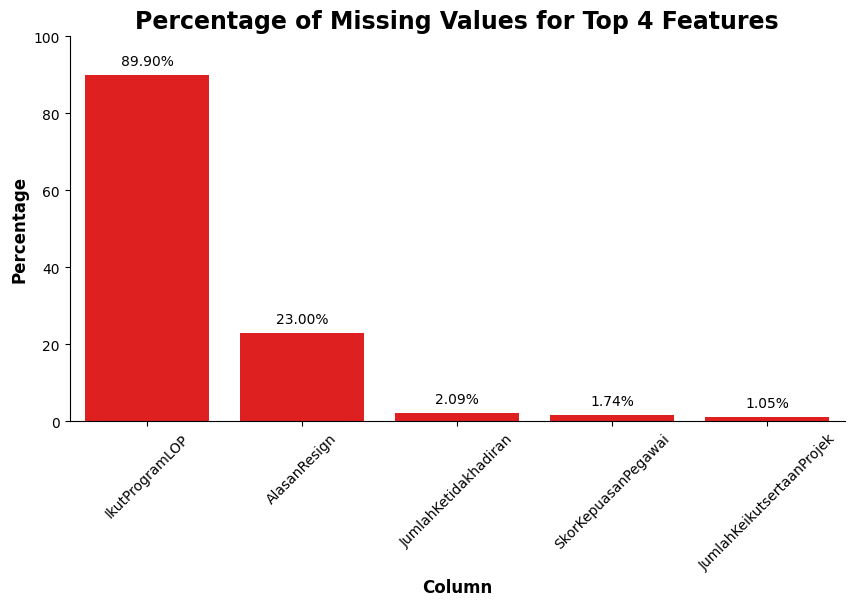

In [ ]:
# Check for missing values in each column
print("Number of missing values per column:")
df_missing = df.isna().sum()
missing_df = df_missing[df_missing > 0]
display(missing_df)

# Check the percentage of missing values
missing_percentages = (df.isna().sum() / len(df)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentages)

# Identify variables with high missing rates (> 10%)
high_missing_vars = missing_percentages[missing_percentages > 10].index
print("\nVariables with missing rates > 10%:")
print(high_missing_vars)

# Sort the missing percentages in descending order and select the top 4
top_missing = missing_percentages.sort_values(ascending=False).head(5)

# Visualize the missing data for the top 4 features
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_missing.index, y=top_missing.values, color='red')

# Annotate the bars with the missing percentage values
for p in ax.patches:
    ax.annotate('%.2f%%' % p.get_height(), xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Set plot title and axis labels
plt.title('Percentage of Missing Values for Top 4 Features', fontsize=17, fontweight='bold')
sns.despine()
plt.xlabel('Column', fontsize=12, fontweight='bold')
plt.ylabel('Percentage', fontsize=12, fontweight='bold')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()

In [ ]:
resign_nanvalue = df[df['AlasanResign'].isna()]
resign_nanvalue[['AlasanResign', 'TanggalResign']]

,AlasanResign,TanggalResign
105,NaN,-
187,NaN,-
189,NaN,-
190,NaN,-
195,NaN,-
...,...,...
279,NaN,-
280,NaN,-
281,NaN,-
282,NaN,-


The following columns have missing values:

1. `IkutProgramLOP`: 89.90% missing values. Consider dropping this column due to the high percentage of missing values.
2. `AlasanResign`: 23.00% missing values. Investigate further and consider imputing missing values or collecting additional data.
3. `JumlahKetidakhadiran`: 2.09% missing values. We can impute missing values using simple methods such as mean, median, or mode.
4. `SkorKepuasanPegawai`: 1.74% missing values. We can impute missing values using simple methods such as mean, median, or mode.
5. `JumlahKeikutsertaanProjek`: 1.05% missing values. We can impute missing values using simple methods such as mean, median, or mode.

#### Handle Missing Values

In [ ]:
# Copy dataframe
dfg = df.copy()

# Define function to handle missing values
def clean_missing(data):
    # Replace missing values in numeric columns with median
   # Drop IkutProgramLOP columns
    data = data.drop(columns='IkutProgramLOP')
    cats_missing = ['AlasanResign', 'SkorKepuasanPegawai']
    for catcol in cats_missing:
        data[catcol] = data[catcol].fillna(data[catcol].mode()[0])

    # Define column that still contain missing values
    num_missing = ['JumlahKeikutsertaanProjek',
                   'JumlahKeterlambatanSebulanTerakhir',
                   'JumlahKetidakhadiran']

    # fill rest of the missing values with median
    for numcol in num_missing:
        data[numcol] = data[numcol].fillna(data[numcol].median())

    return data

# Clean missing values
dfg = clean_missing(dfg)

# Verify if there are any remaining missing values
missing_percentages2 = dfg.isnull().sum().sum()
print("Number of missing values after imputation:")
print(dfg.isna().sum())

Number of missing values after imputation:
Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
PernahBekerja                         0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                        

#### Check Duplicate Values

In [ ]:
# Checking Duplicate Values
duplicated = dfg.duplicated().sum()
print(f'Total Number of duplicated values per column in df: {duplicated}')

Total Number of duplicated values per column in df: 0


The dataset dfg has been checked for duplicate values, and the result shows that there are no duplicate values to be handled. Indicating that all rows in the dataset are unique and there are no duplicate records.

#### Statistical Summary

In [ ]:
# Separate the numeric columns and categorical columns
nums = dfg.select_dtypes('number')
print("Statistical Summary for Numerical Colums : ")
display(nums.describe())


cats = dfg.select_dtypes(['object'])
print("Statistical Summary for Categorical Colums : ")
display(cats.describe())

Statistical Summary for Numerical Colums : 


,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,105923.324042,3.101045,3.888502,1.167247,0.411150,10.439024
std,4044.977599,0.836388,0.913060,2.285537,1.273018,6.829769
min,100282.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,5.000000
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000


Statistical Summary for Categorical Colums : 


,Username,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
count,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287
unique,285,5,2,3,14,3,5,5,9,287,287,3,2,11,284,97,127,53
top,boredEggs0,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Sarjana,1,masih_bekerja,14/06/1987,10/01/2011,14/01/2020,-
freq,2,132,167,217,109,169,85,72,85,1,1,176,286,198,2,12,17,198


Based on statistical summary of the Numerical columns and Categorical Columns , here is a summary of the key observations:
Numerical Columns:

1. The data has 287 observations and The `EnterpriseID` column has a mean of 105923 and a standard deviation of 4044.
2. The `SkorSurveyEngagement` and `SkorKepuasanPegawai` columns have means around 3 and standard deviations around 0.8-0.9, indicating relatively low scores.
3. The `JumlahKeikutsertaanProjek` column has a mean of 1.17 and a standard deviation of 2.29, indicating varying levels of project participation.
4. The `JumlahKeterlambatanSebulanTerakhir` and `JumlahKetidakhadiran` columns have means around 0.4 and 10.44, respectively, indicating some level of tardiness and absenteeism.

Categorical Columns:

1. The data has 287 observations with 285 unique usernames.
2. The most common marital status is "Belum_menikah" (not married), and the most common gender is "Wanita" (female).
3. The majority of employees are "FullTime" and have a "Freshgraduate_program" level of education.
4. The top job title is "Software Engineer (Back End)" and the most common hiring platform is "Indeed".
5. The most common reason for resignation is "masih_bekerja" (still working), indicating that many employees have not resigned.



#### Feature Engineering

In [ ]:
display(dfg['AlasanResign'].value_counts())

masih_bekerja               198
jam_kerja                    16
ganti_karir                  14
kejelasan_karir              11
tidak_bisa_remote            11
toxic_culture                10
leadership                    9
tidak_bahagia                 8
internal_conflict             4
Product Design (UI & UX)      4
apresiasi                     2
Name: AlasanResign, dtype: int64

In [ ]:
display(dfg['Pekerjaan'].value_counts())

Software Engineer (Back End)      109
Software Engineer (Front End)      72
Software Engineer (Android)        24
Product Design (UI & UX)           24
Product Manager                    17
Data Analyst                       16
Data Engineer                      10
Scrum Master                        3
Software Engineer (iOS)             3
DevOps Engineer                     3
Digital Product Manager             2
Machine Learning Engineer           2
Product Design (UX Researcher)      1
Software Architect                  1
Name: Pekerjaan, dtype: int64

In the `AlasanResign` and `Pekerjaan` columns, there are instances of the value 'Product Design (UI & UX)'. Given that 'Product Design (UI & UX)' is a job title and belongs in the Pekerjaan column, its presence in the `AlasanResign` column is incorrect. Therefore, it should be replaced with 'alasan_tidak_jelas' (unclear reason).

In [ ]:
display(dfg['StatusPernikahan'].value_counts())

Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: StatusPernikahan, dtype: int64

The `StatusPernikahan` column contains some entries marked as '-', which likely represent unknown or unspecified marital statuses. To ensure consistency and clarity in your dataset, it is recommended to replace '-' with 'Lainnya'. This adjustment will categorize all entries in the `StatusPernikahan` column under defined marital status categories.

In [ ]:
invalid_reason = dfg[dfg.AlasanResign=='Product Design (UI & UX)']
invalid_reason['Pekerjaan']

27     Software Engineer (Front End)
124         Product Design (UI & UX)
147    Software Engineer (Front End)
203     Software Engineer (Back End)
Name: Pekerjaan, dtype: object

In [ ]:
def feature_engineering(data):
  # Replace 'Product Design (UI & UX)' in 'AlasanResign' with 'alasan_tidak_jelas'
  data['AlasanResign'].replace({'Product Design (UI & UX)': 'alasan_tidak_jelas'}, inplace=True)

  # Replace '-' in 'StatusPernikahan' with 'Lainnya'
  data['StatusPernikahan'].replace({'-': 'Lainnya'}, inplace=True)

  # Convert 'TanggalLahir to datetime format
  data['TanggalLahir'] = pd.to_datetime(data['TanggalLahir'])

  # Calculate age assuming the current year is 2020
  data['Age'] = 2020 - data['TanggalLahir'].dt.year

  # Define the condition for the 'Age' column
  condition_age = [
      (data['Age'] >= 30),
      (data['Age'] >= 40) & (data['Age'] < 50),
      (data['Age'] >= 50) & (data['Age'] < 60),
      (data['Age'] >= 60)
  ]

  # Define the corresponding labels for the age segment
  age_segment = ['Young Adult', 'Adult', 'Middle Aged', 'Senior']

  # Use np.select to create the new 'AgeGroup' column
  data['AgeGroup'] = np.select(condition_age, age_segment)

  # Convert 'TanggalHiring' to datetime format
  data['TanggalHiring'] = pd.to_datetime(data['TanggalHiring'])

  # Create new columns of hiring year and resignation year data
  data['HiringYear'] = data['TanggalHiring'].dt.year

  # Create the colum Resign
  data['Resign'] = data['TanggalResign'].apply(lambda x: 'No' if x == '-' else 'Yes')

  # Replace '-' value in 'TanggalResign' with nan
  data['TanggalResign'] = data['TanggalResign'].replace('-', np.nan)

  # Convert 'TanggalResign' to datetime format
  data['TanggalResign'] = pd.to_datetime(data['TanggalResign'])

  # Create new columns of resignation year data
  data['ResignationYear'] = data['TanggalResign'].dt.year

  # Convert datetime format of 'TanggalPenilaianKaryawan'
  data['TanggalPenilaianKaryawan'] = pd.to_datetime(data['TanggalPenilaianKaryawan'])

  # Create new column 'YearEval' from 'TanggalPenilaianKaryawan'
  data['AssessmentDate'] = data['TanggalPenilaianKaryawan'].dt.year

  # Calculate 'HiringToEval' (in year) how long is it from hiring to evaluation
  data['HiringAssessmentYear'] = data['AssessmentDate'] - data['HiringYear']

  return data

# apply the feature engineering to the dataset
dfh = feature_engineering(dfg)

In [ ]:
dfh.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Age,AgeGroup,HiringYear,Resign,ResignationYear,AssessmentDate,HiringAssessmentYear
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,masih_bekerja,1972-01-07,2011-10-01,2016-02-15,NaT,48,Young Adult,2011,No,NaN,2016,5
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,toxic_culture,1984-04-26,2014-06-01,2020-01-17,2018-06-16,36,Young Adult,2014,Yes,2018.0,2020,6
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,jam_kerja,1974-07-01,2011-10-01,2016-10-01,2014-09-24,46,Young Adult,2011,Yes,2014.0,2016,5
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,masih_bekerja,1979-11-24,2014-02-17,2020-04-02,NaT,41,Young Adult,2014,No,NaN,2020,6
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,ganti_karir,1974-07-11,2013-11-11,2020-01-22,2018-06-09,46,Young Adult,2013,Yes,2018.0,2020,7


## Task 2 - Annual Report on Employee Number Changes
Work Stage:

1. Create Two Aggregated Tables
2. Join the Two Tables
3. Impute Missing Data
4. Calculate Employee Statistics
5. Plot the Data
6. Interpret the Plot

In [ ]:
# Create an aggregate table
hired_aggregate =  dfh.groupby('HiringYear')['EnterpriseID'].count().reset_index(name='TotalHired')
resigned_aggregate = dfh.groupby('ResignationYear')['EnterpriseID'].count().reset_index(name='TotalResigned')

# Make 2 aggregate column
employee = pd.merge( resigned_aggregate, hired_aggregate, left_on='ResignationYear', right_on='HiringYear', how='outer')

# Define the fill values for each column
fill_columns = {
    'ResignationYear': 'HiringYear',  # Fill missing 'ResignationYear' with 'HiringYear'
    'TotalResigned': 0,            # Fill missing 'TotalResigned' with 0
    'HiringYear': 'ResignationYear',  # Fill missing 'HiringYear' with 'ResignationYear'
    'TotalHired': 0             # Fill missing 'TotalHired' with 0
}

# Impute missing values
for col, fill_value in fill_columns.items():
    if isinstance(fill_value, str):  # Fill with values from another column
        employee[col] = employee[col].fillna(employee[fill_value])
    else:  # Fill with a constant value
        employee[col] = employee[col].fillna(fill_value)

# Verify the changes
print(employee.head())

# Rename columns and drop unnecessary ones
resign_rename = {'ResignationYear': 'Year'}
employee = employee.rename(columns=(resign_rename))
employee.drop(columns='HiringYear', inplace=True)

# Change 'Year' dtype to int
employee['Year'] = employee['Year'].astype(int)

# Calculate additional columns
employee['AnnualNetChange'] = employee['TotalHired'] - employee['TotalResigned']
employee.sort_values(by='Year', inplace=True)
employee['CumulatTotalCumulativeHiresiveHiring'] = employee['AnnualNetChange'].cumsum()
employee['TotalCumulativeResignations'] = employee['TotalResigned'].cumsum()

# Create a new column by calculate the remaining employees
employee['RemainingEmployees'] = employee['CumulatTotalCumulativeHiresiveHiring'] - employee['TotalCumulativeResignations']

employee

   ResignationYear  TotalResigned  HiringYear  TotalHired
0           2013.0            5.0      2013.0        43.0
1           2014.0           12.0      2014.0        56.0
2           2015.0            8.0      2015.0        31.0
3           2016.0            8.0      2016.0        14.0
4           2017.0           19.0      2017.0         5.0


,Year,TotalResigned,TotalHired,AnnualNetChange,CumulatTotalCumulativeHiresiveHiring,TotalCumulativeResignations,RemainingEmployees
8,2006,0.0,1.0,1.0,1.0,0.0,1.0
9,2007,0.0,2.0,2.0,3.0,0.0,3.0
10,2008,0.0,2.0,2.0,5.0,0.0,5.0
11,2009,0.0,7.0,7.0,12.0,0.0,12.0
12,2010,0.0,8.0,8.0,20.0,0.0,20.0
13,2011,0.0,76.0,76.0,96.0,0.0,96.0
14,2012,0.0,41.0,41.0,137.0,0.0,137.0
0,2013,5.0,43.0,38.0,175.0,5.0,170.0
1,2014,12.0,56.0,44.0,219.0,17.0,202.0
2,2015,8.0,31.0,23.0,242.0,25.0,217.0


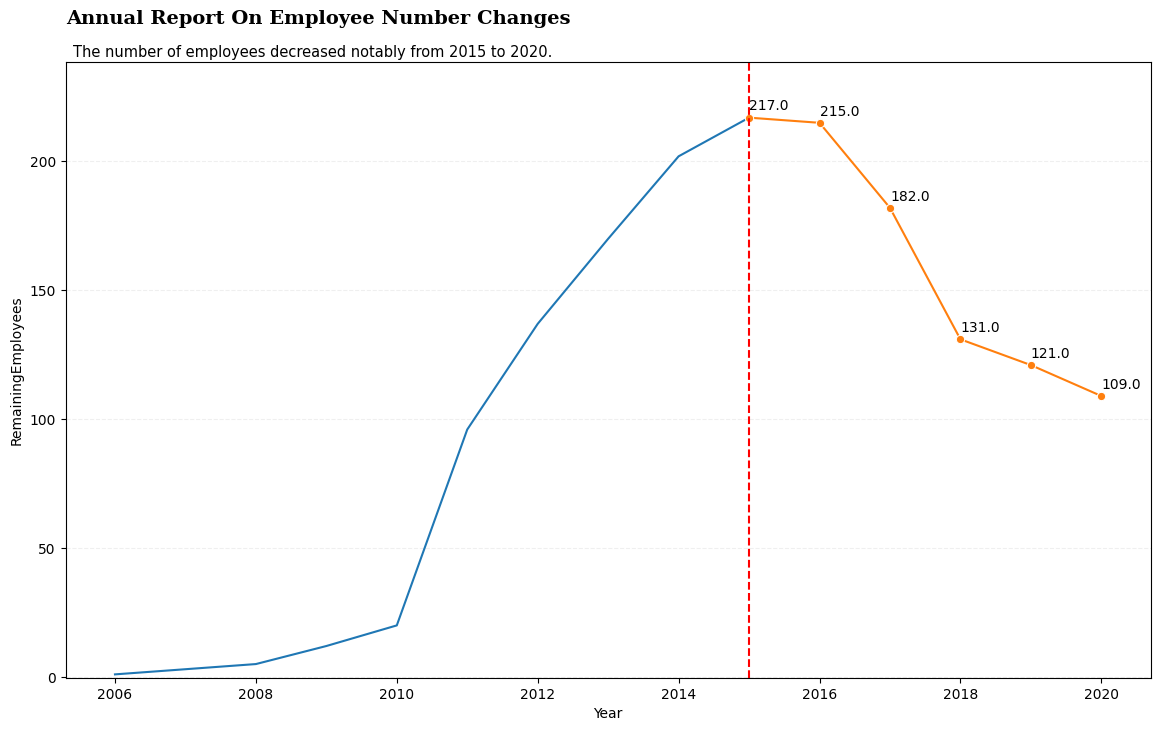

In [ ]:
# Define year ranges
recent_years = list(range(2015, 2021))
previous_years = list(range(2006, 2016))

# Filter data for the specified year ranges
data_recent = employee[employee.Year.isin(recent_years)]
data_previous = employee[employee.Year.isin(previous_years)]

# Create a larger figure
plt.figure(figsize=(14, 8))  # Increase the width and height

# Plot the line for the previous year range
sns.lineplot(
    x='Year',
    y='RemainingEmployees',
    data=data_previous
)

# Plot the line for the recent year range with markers
sns.lineplot(
    x='Year',
    y='RemainingEmployees',
    data=data_recent,
    marker='o'
)

# Add data labels
for x, y in zip(data_recent['Year'], data_recent['RemainingEmployees']):
    plt.text(x=x, y=y + 3, s=f'{y}', color='black')

# Customize plot
fdbold = {
    'family': 'serif',
    'color': 'black',
    'weight': 'bold',
    'size': 14
}

plt.title(
    'Annual Report On Employee Number Changes',
    fontdict=fdbold,
    loc='left',
    pad=27.5
)

plt.text(
    2005.40,
    employee['RemainingEmployees'].max() * 1.11,
    'The number of employees decreased notably from 2015 to 2020.',
    fontsize=10.5,
    color='black'
)

plt.axvline(2015, color='r', linestyle='--', linewidth=1.5)
plt.ylim(-0.3, employee['RemainingEmployees'].max() * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.2)

plt.show()

The graph shows the total number of employees remaining over the years from 2006 to 2020. The number of employees increased until 2015, when it began to decrease significantly. This decline could indicate a few factors, including economic downturn, company restructuring, or outsourcing. It's important to note that this is just a visual representation and further investigation would be needed to determine the specific causes of the decline.

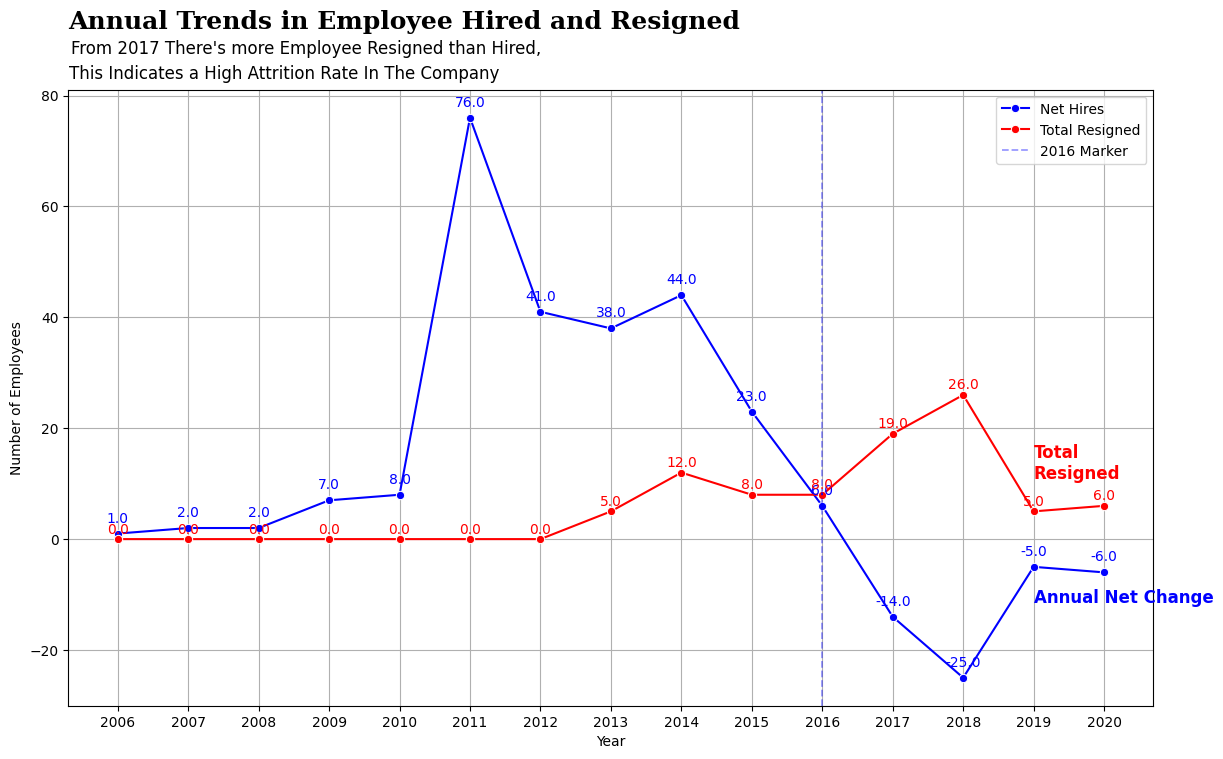

In [ ]:
# Plot AnnualNetChange and TotalResigned on the same axis
plt.figure(figsize=(14, 8))

# Plot AnnualNetChange
sns.lineplot(
    x='Year',
    y='AnnualNetChange',
    data=employee,
    marker='o',
    color='blue',
    label='Net Hires'
)

# Plot TotalResigned
sns.lineplot(
    x='Year',
    y='TotalResigned',
    data=employee,
    marker='o',
    color='red',
    label='Total Resigned'
)

# Add data labels for AnnualNetChange
for x, y in zip(employee['Year'], employee['AnnualNetChange']):
    plt.text(
        x=x,
        y=y + (max(employee['AnnualNetChange']) * 0.02),  # Adjust the offset as needed
        s=f'{y}',
        color='blue',
        ha='center',
        va='bottom'
    )

# Add data labels for TotalResigned
for x, y in zip(employee['Year'], employee['TotalResigned']):
    plt.text(
        x=x,
        y=y + (max(employee['TotalResigned']) * 0.02),  # Adjust the offset as needed
        s=f'{y}',
        color='red',
        ha='center',
        va='bottom'
    )

# Add vertical line for the year 2016
plt.axvline(2016, color='b', linestyle='--', linewidth=1.3, alpha=0.4, label='2016 Marker')

# Customize plot
plt.title('Annual Trends in Employee Hired and Resigned', fontdict={'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 18}, pad=44, loc='left')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.xticks(employee['Year'])
plt.grid(True)

# Add text annotations
plt.text(2005.34, 87.5, "From 2017 There's more Employee Resigned than Hired,", fontsize=12, color='black')
plt.text(2005.31, 83, "This Indicates a High Attrition Rate In The Company", fontsize=12, color='black')
plt.text(2019, -11.4, 'Annual Net Change', color='blue', fontsize=12, weight='bold')
plt.text(2019, 11, 'Total\nResigned', color='red', fontsize=12, weight='bold')

plt.legend()
plt.show()


The number of remaining employees over the years, starting from 2006. The graph shows an upward trend from 2006 to 2015, with a sharp decrease starting in 2016. The data suggests that the total number of remaining employees decreased significantly from 2015 to 2020.

In [ ]:
dfh['Resign'].value_counts()

No     198
Yes     89
Name: Resign, dtype: int64

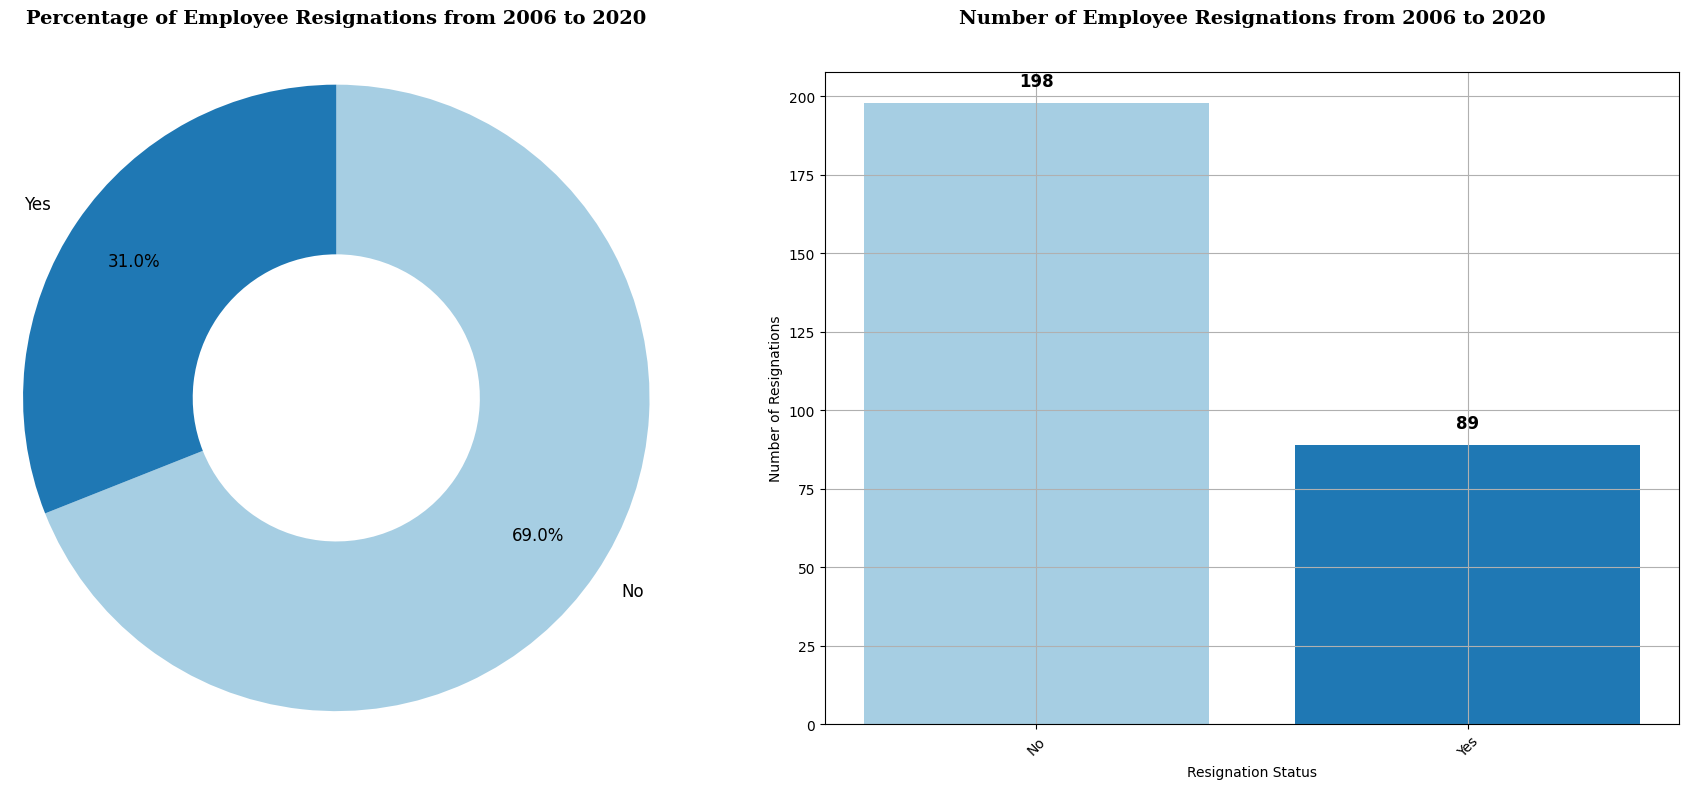

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(18, 8))

# Calculate the total resignations using value_counts
total_resigned_count = dfh['Resign'].value_counts()
total_resigned_sum = total_resigned_count.sum()

# Calculate percentages
sizes = (total_resigned_count / total_resigned_sum) * 100
labels = total_resigned_count.index

# Create subplots
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
# Plot Pie Chart
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired(range(len(labels))),  # Use a colormap for varied colors
    textprops={'fontsize': 12},
    wedgeprops=dict(width=0.65),
    pctdistance=0.78,
    radius=1.2,
    counterclock=False
)
plt.title('Percentage of Employee Resignations from 2006 to 2020', fontdict=fdbold, pad=35)

# Create Bar Chart in the next subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
# Plot Bar Chart
plt.bar(labels, total_resigned_count, color=plt.cm.Paired(range(len(labels))))

# Add data labels to bar chart
for index, value in enumerate(total_resigned_count):
    plt.text(
        index,
        value + max(total_resigned_count) * 0.02,  # Adjust the offset as needed
        f'{value}',
        ha='center',
        va='bottom',
        fontsize=12,
        weight='bold',
        color='black'
    )

plt.xlabel('Resignation Status')
plt.ylabel('Number of Resignations')
plt.title('Number of Employee Resignations from 2006 to 2020', fontdict=fdbold, pad=35)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(True)

plt.tight_layout()  # Adjust subplot parameters to fit the figure area
plt.show()

Based on the information provided in the two images, a few key insights can be made:

1. **Percentage of Employee Resignations**: The pie chart shows that 69.0% of employees answered "No" to the question about resignations, while 31.0% answered "Yes". This indicates that a significant majority of employees did not resign during the 2006-2020 period.
2. **Number of Employee Resignation**s: The bar chart shows the number of employee resignations over the same time period. The number of "No" resignations is 198, while the number of "Yes" resignations is 89. This reinforces the finding that the majority of employees did not resign.
3. **Trend over Time**: While the data is not broken down by year, the overall trend suggests that employee resignations were relatively low during the 2006-2020 period, with the majority of employees choosing to stay with the organization.

In summary, the data indicates that the vast majority of employees, around 69%, did not resign from their positions between 2006 and 2020, suggesting a relatively stable workforce during that time period.

## Task 3 - Resign Reason Analysis For Employee Attrition Management Strategy
Work Stage:

1. Create aggregated tables resign or not resign by their job title.
2. Join 2 aggregated tables (Resign and Not Resign) into 1 table.
3. Create 2 new columns from the joined table total employee, and percentage of remaining employees.
4. Create a plot to visualize the percentage of remaining employees by job title.
5. Create aggregated tables to count total resign employee by career level, employee performance, and resign reason.
6. Create a plot to visualize the aggregated table.
7. Write an interpretation and recommendation for the plot.

In [ ]:
# Group by job and resign status
job_resign_counts = dfh.groupby('Pekerjaan')['Resign'].value_counts().reset_index(name='TotalResigned')

# Create dataframes for resignations and remaining employees
resigned = job_resign_counts[job_resign_counts['Resign']=='Yes'].drop(columns='Resign')
not_resigned = job_resign_counts[job_resign_counts['Resign']=='No'].drop(columns='Resign')
not_resigned = not_resigned.rename(columns={'TotalResigned': 'TotalRemaining'})

# Merge dataframes
merged_data = pd.merge(resigned, not_resigned, on='Pekerjaan', how='outer')
merged_data.fillna(0, inplace=True)
merged_data['TotalResigned'] = merged_data['TotalResigned'].astype(int)
merged_data['TotalRemaining'] = merged_data['TotalRemaining'].astype(int)
merged_data['TotalEmployees'] = merged_data['TotalRemaining'] - merged_data['TotalResigned']
merged_data['PercentageRemaining'] = round((merged_data['TotalEmployees'] / merged_data['TotalRemaining']) * 100, 2)
merged_data['PercentageResigned'] = round((merged_data['TotalResigned'] / merged_data['TotalRemaining']) * 100, 2)

# Sort by percentage of resignations
merged_data['TotalPercentage'] = 100

# Sort the 'merged_data' dataframe by the 'PercentageResignations' column
merged_data = merged_data.sort_values(by='PercentageResigned')

# Display the 'merged_data' dataframe
display(merged_data)

,Pekerjaan,TotalResigned,TotalRemaining,TotalEmployees,PercentageRemaining,PercentageResigned,TotalPercentage
7,DevOps Engineer,0,3,3,100.00,0.00,100
8,Digital Product Manager,0,2,2,100.00,0.00,100
9,Machine Learning Engineer,0,2,2,100.00,0.00,100
10,Product Design (UX Researcher),0,1,1,100.00,0.00,100
11,Scrum Master,0,3,3,100.00,0.00,100
12,Software Architect,0,1,1,100.00,0.00,100
13,Software Engineer (iOS),0,3,3,100.00,0.00,100
5,Software Engineer (Back End),28,81,53,65.43,34.57,100
4,Software Engineer (Android),7,17,10,58.82,41.18,100
1,Data Engineer,3,7,4,57.14,42.86,100


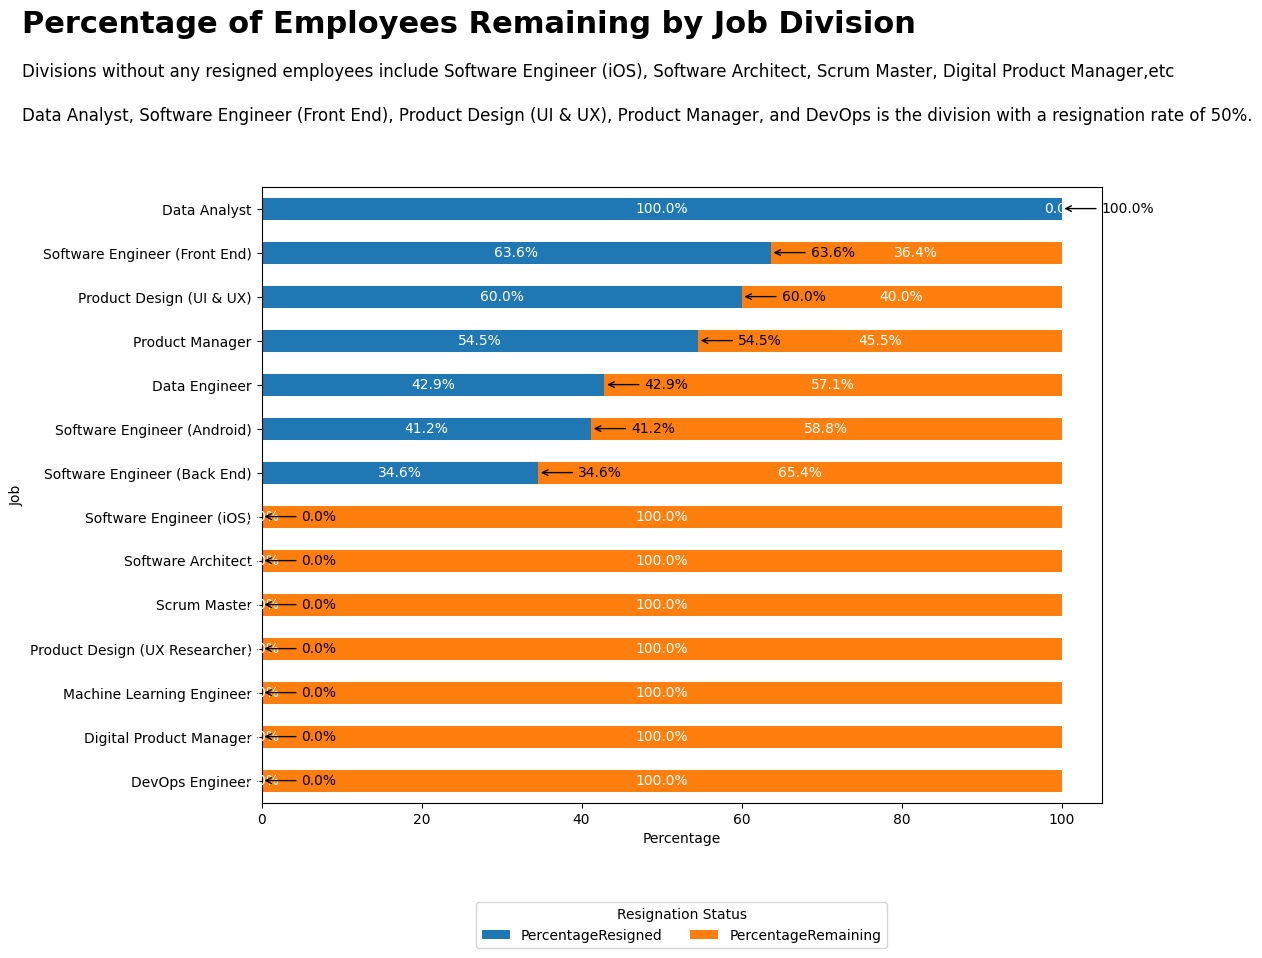

In [ ]:
# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(12, 8))
merged_data.plot(kind='barh', y=['PercentageResigned', 'PercentageRemaining'], x='Pekerjaan', stacked=True, ax=ax)

# Customize the plot
ax.set_xlabel('Percentage')
ax.set_ylabel('Job')

# Add text for the plot
for i, (v_resigned, v_remaining) in enumerate(zip(merged_data['PercentageResigned'], merged_data['PercentageRemaining'])):
    ax.text(v_resigned / 2, i, f'{v_resigned:.1f}%', va='center', ha='center', color='white')
    ax.text(v_resigned + v_remaining / 2, i, f'{v_remaining:.1f}%', va='center', ha='center', color='white')

# Add annotation for percentage resigned
for i, v_resigned in enumerate(merged_data['PercentageResigned']):
    ax.annotate(f'{v_resigned:.1f}%', xy=(v_resigned, i), xytext=(v_resigned + 5, i), va='center',
                arrowprops=dict(arrowstyle='->', color='black'))

# Adjust the spacing
plt.subplots_adjust(left=0.2)

# Rotate the y-axis labels if needed
plt.yticks(rotation=0)

# Add explanatory text
plt.text(x=-30, y=17, s='Percentage of Employees Remaining by Job Division', fontsize=22, color='black', weight='bold')
plt.text(x=-30, y=16, s='Divisions without any resigned employees include Software Engineer (iOS), Software Architect, Scrum Master, Digital Product Manager,etc', fontsize=12)
plt.text(x=-30, y=15, s='Data Analyst, Software Engineer (Front End), Product Design (UI & UX), Product Manager, and DevOps is the division with a resignation rate of 50%.', fontsize=12)

# Adjust legend position
ax.legend(title='Resignation Status', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Display the plot
plt.show()

The key insights from this data visualization on the Percentage of Employees Remaining by Job Division are:

1. Divisions with no resigned employees (100% remaining): Software Engineer (iOS), Software Architect, Scrum Master, Digital Product Manager, Product Design (UX Researcher), Machine Learning Engineer, and DevOps Engineer.
2. The division with the highest resignation rate of 50% is Data Analyst, Software Engineer (Front End), Product Design (UI & UX), Product Manager, and DevOps.
3. The divisions with a resignation rate below 50% include Software Engineer (Back End) at 34.6%, Software Engineer (Android) at 41.2%, and Data Engineer at 42.9%.
4. The visualization clearly separates the "PercentageResigned" and "PercentageRemaining" for each job division, making it easy to identify the divisions with high and low retention rates.
5. This data can help the organization identify job roles that may need more attention or improvements to reduce the high resignation rates and improve employee retention.

In [ ]:
# Replace value
job_resignation_summary = dfh.groupby(['Pekerjaan', 'AlasanResign'])['Resign'].value_counts().reset_index(name='Total')

# Filter the rows where 'Resign' is 'Yes'
job_resignation_summary = job_resignation_summary[job_resignation_summary['Resign'] == 'Yes']

# Create a dictionary to map unique values to integers for source and target
unique_jobs = job_resignation_summary['Pekerjaan'].unique()
unique_reasons = job_resignation_summary['AlasanResign'].unique()
all_labels = list(unique_jobs) + list(unique_reasons)
label_to_index = {label: index for index, label in enumerate(all_labels)}

# Create source, target, and value lists with more descriptive names
job_source_indices = job_resignation_summary['Pekerjaan'].map(label_to_index).values
resignation_reason_indices = job_resignation_summary['AlasanResign'].map(label_to_index).values
resignation_counts = job_resignation_summary['Total'].values

# Create the Sankey chart
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=25,
        line=dict(color='black', width=0.5),
        label=all_labels,
    ),
    link=dict(
        source=job_source_indices,
        target=resignation_reason_indices,
        value=resignation_counts,
        line=dict(width=0.5, color='white')
    )
)])

# Update layout with customized fonts and sizes
fig.update_layout(
    title_text='Reasons for Employee Resignations by Job Position',
    title_font=dict(
        family='Arial, sans-serif',  # Change to desired font family
        size=24,  # Change to desired font size
        color='darkblue'  # Change to desired font color
    ),
    font=dict(
        family='Arial, sans-serif',  # Change to desired font family
        size=14,  # Change to desired font size
        color='black'  # Change to desired font color
    ),
    width=800,
    height=800
)

fig.show()

Insights:

1. Data Analyst Position:
   
    For the Data Analyst position, "toxic culture" accounts for 75% of the resignation reasons, and "internal conflict" accounts for 15%. This indicates that the Data Analyst division is facing a significant challenge in its work culture and internal dynamics, with 90% of resignations attributed to these two factors. Toxic culture refers to a harmful work environment where negative behaviors, such as bullying, lack of support, and poor communication, prevail. Internal conflict denotes disputes and disagreements among team members that disrupt the workflow and create a hostile atmosphere.

2. Software Engineer (Back End) Position:
   
    For the Software Engineer (Back End) position, "jam kerja" (work hours) accounts for 50% of the resignation reasons, and "tidak bisa remote" (inability to work remotely) accounts for 30%. This suggests that work-life balance and flexibility in work arrangements are major pain points for the Back End Software Engineers. Work hours refer to the long or irregular working hours that can lead to burnout and dissatisfaction. Inability to work remotely indicates that the lack of remote work options limits employees' flexibility and impacts their work-life balance.

3. Product Design (UI & UX) Position:
    
    For the Product Design (UI & UX) position, "alasan tidak jelas" (unclear reasons) accounts for 60% of the resignation reasons, and "ganti karir" (change in career) accounts for 40%. The high percentage of unclear reasons and career changes indicates a need for better understanding of the specific challenges and aspirations of the Product Design team. Unclear reasons imply that employees leave without providing specific feedback on their reasons for resignation. Career change refers to employees leaving to pursue different career paths, suggesting dissatisfaction with current career development opportunities.

Recommendations:
1. For the Data Analyst division, it is crucial to prioritize addressing the "toxic culture" and "internal conflict" issues, as these factors are the primary drivers of resignations for this critical role. This can involve implementing team-building activities, improving communication, and establishing conflict resolution mechanisms.

2. For the Software Engineer (Back End) team, it is important to evaluate the work hours, remote work policies, and work-life balance initiatives to address the identified pain points. This may include offering flexible working hours, allowing remote work options, and promoting work-life balance programs.

3. For the Product Design (UI & UX) team, conducting exit interviews and employee surveys to better understand the reasons behind the "unclear reasons" and "career change" factors is essential. This will help develop targeted retention strategies and support employees' career aspirations.

4. Implementing regular feedback loops, mentorship programs, and career development opportunities across all job positions can help better support and retain valuable employees. By focusing on these numerical insights and addressing the specific challenges faced by each job position, the organization can develop more targeted and effective strategies to improve employee retention and build a stronger, more engaged workforce.

In [ ]:
# Filter and aggregate data for Data Analyst
highest_resign = dfh[dfh['Pekerjaan'] == 'Data Analyst'].groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign'])['EnterpriseID'].count().reset_index()
highest_resign = highest_resign.rename(columns={'EnterpriseID': 'Total'})

In [ ]:
# Calculate total for percentage calculation
total_resignations = highest_resign['Total'].sum()

# Calculate percentage for each segment
highest_resign['Percentage'] = (highest_resign['Total'] / total_resignations * 100).round(2)

# Create the sunburst chart with custom colors and percentage labels
fig = px.sunburst(
    highest_resign,
    path=['JenjangKarir', 'AlasanResign', 'PerformancePegawai'],
    values='Total',
    color='AlasanResign',  # Coloring by reason for resignation
    color_discrete_map={
        'Toxic Culture': 'red',
        'Internal Conflict': 'orange',
        'Career Change': 'blue'
    },
    labels={'Total': 'Count'}
)

# Update the layout with percentage labels
fig.update_traces(
    textinfo="label+percent entry",
    insidetextorientation="radial"
)

# Update the layout
fig.update_layout(
    height=1100,
    width=1100,
    title='Employees Resigning from the Data Analyst Division',
    title_font_size=35,
    showlegend=False,
    margin=dict(t=175),
    annotations=[
        dict(
            text='100% of employees resigning from the Data Analyst division are fresh graduates. <br>75% of their resignation reasons are due to toxic culture, while the remaining are due to internal conflicts. <br>Nevertheless, 50% of employees in the Data Analyst division have excellent performance.',
            font=dict(size=16),
            x=0.5,
            y=1.1,
            showarrow=False,
            align='center'
        )
    ]
)

# Show the figure
fig.show()

The key insights from this visualization on the reasons for employees resigning from the Data Analyst division are:

1. 100% of the employees resigning from the Data Analyst division are fresh graduates.
2. The primary reason for resignations is "toxic culture", accounting for 75% of the total resignations.
3. The second most prevalent reason is "internal_conflict", contributing to 15% of the resignations.
4. The remaining 10% of resignations are due to factors like "Biasa" (8%), "Sangat bagus" (6%), and "Kurang" (6%).
5. The visualization highlights that all the employees resigning from the Data Analyst division are fresh graduates, indicating a high turnover rate among new hires in this division.
6. Despite the high resignation rate, the data notes that 50% of employees in the Data Analyst division have excellent performance, implying that the division is losing some of its top talent due to the organizational and management challenges.
7. The visualization provides a comprehensive breakdown of the various reasons for resignations, allowing the organization to identify the root causes and implement targeted interventions to improve the work culture, address internal conflicts, and retain top-performing employees.

In [ ]:
# Group by JenjangKarir, PerformancePegawai, AlasanResign, and count the Resign values
career_performance_resign = dfh.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign'])['Resign'].value_counts().reset_index(name='Total')

# Filter the rows where 'Resign' is 'Yes'
career_performance_resign_yes = career_performance_resign[career_performance_resign['Resign'] == 'Yes']

# Create the sunburst chart
fig = px.sunburst(
    career_performance_resign_yes,
    path=['JenjangKarir', 'PerformancePegawai', 'AlasanResign'],
    values='Total'
)

# Make the layout
fig.update_layout(
    width=800,
    height=800,
    title={
        'text': 'Employee Resignation by Career Level, Performance, and Reason',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'family': 'Arial, sans-serif',  # Change to desired font family
            'size': 24,  # Change to desired font size
            'color': 'darkblue'  # Change to desired font color
        }
    },
    font={
        'family': 'Arial, sans-serif',  # Change to desired font family
        'size': 14,  # Change to desired font size
        'color': 'black'  # Change to desired font color
    }
)

fig.show()

Insights:

1. The visualization provides a comprehensive overview of employee resignations across different career levels, performance levels, and reasons for leaving the organization.
2. Employees at the "Fresh graduate_program" level are primarily resigning due to "Sangat_kurang" (highly lacking) and "toxic_culture" factors, indicating challenges in the onboarding and retention of new graduates.
3. Employees at the "Mid_level" are resigning due to a mix of reasons, including "Sangat_bagus" (highly good), "Sangat_kurang" (highly lacking), and "Biasa" (average), suggesting potential issues with career progression, performance management, and work environment.
4. At the "Bagus" (good) performance level, employees are resigning due to "Sangat_kurang" (highly lacking) and "Biasa" (average) factors, implying a disconnect between their performance and the organization's support or recognition.
5. The "Biasa" (normal) performance level has a wide range of resignation reasons, including "toxic_culture", "leadership", and "tidak_bisa_remote" (unable to work remotely), highlighting the complexity of issues faced by this group of employees.

Recommendations:

1. Fresh Graduate Program:
    *   Onboarding and Training: Redesign the onboarding program to ensure new graduates receive comprehensive training and support. Introduce a buddy system where new hires are paired with experienced employees for guidance.
    *   Address Toxic Culture: Conduct workshops and training sessions focused on fostering a positive work environment and addressing toxic behaviors. Implement regular check-ins with new graduates to address any issues early on.
    *   Support Systems: Enhance support systems for new graduates by providing access to resources, career counseling, and mentorship programs.


2. Mid-Level Employees:

    *   Career Development: Create clear career progression pathways and provide opportunities for skill development and advancement. Offer training programs, certifications, and rotational assignments to keep employees engaged and growing.
    *   Performance Management: Improve the performance management process by providing regular, constructive feedback and recognizing achievements. Address performance issues promptly and provide support for improvement.
    *   Work Environment: Foster a collaborative and inclusive work environment. Conduct team-building activities and encourage open communication to address any work environment issues.

3. Good Performance Level Employees:

    *   Recognition and Rewards: Develop a robust recognition program that acknowledges and rewards high-performing employees. This can include bonuses, promotions, and public recognition.
    *   Challenging Assignments: Provide opportunities for high performers to take on challenging and meaningful projects that align with their career goals.
    *   Support and Resources: Ensure high-performing employees have access to the resources and support they need to continue excelling in their roles.

4. Normal Performance Level Employees:

    *  Work Culture Improvement: Conduct surveys and focus groups to understand the specific issues related to toxic culture. Implement initiatives to improve workplace culture, such as diversity and inclusion programs, and employee wellness initiatives.
    *   Leadership Development: Invest in leadership training and development programs to ensure managers are equipped to lead effectively and create a supportive work environment.
    *   Remote Work Policies: Review and enhance remote work policies to provide more flexibility. Consider hybrid work models that allow employees to work from home part-time.

5. Continuous Feedback and Monitoring:

    *   Feedback Loops: Establish regular feedback mechanisms, such as quarterly surveys and pulse checks, to continuously monitor employee satisfaction and engagement.
    *   Exit Interviews: Conduct detailed exit interviews to gather insights on why employees are leaving. Use this information to make data-driven improvements to retention strategies.
    *   Engagement Initiatives: Implement employee engagement initiatives based on feedback, such as town hall meetings, suggestion boxes, and open-door policies with management.

By addressing the nuanced insights revealed in the visualization, the organization can develop a more holistic and targeted approach to improving employee satisfaction, engagement, and long-term retention across the workforce.

## Task 4 - Build An Automated Resignation Behavior Prediction Using Machine Learning
work Stage :

1. Review Data Preprocessing Steps
2. Data Splitting and Balancing
3. Train ML Models
4. Select the Best ML Model
5. Visualize ML Metrics

#### Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [ ]:
df['HiringPlatform'].value_counts()

Indeed                     85
LinkedIn                   69
Google_Search              46
Diversity_Job_Fair         27
Employee_Referral          24
CareerBuilder              22
Website                    11
Other                       2
On-line_Web_application     1
Name: HiringPlatform, dtype: int64

In [ ]:
# Copy data frame
df_preprocessing = df.copy()
df_preprocessing = feature_engineering(df_preprocessing)

# Define the dictionary of Map pekerjaan
pekerjaan_mapping_alt = {
    'Software Engineer (Back End)': 'Engineering Team',
    'Software Engineer (Front End)': 'Engineering Team',
    'Software Engineer (Android)': 'Engineering Team',
    'Software Engineer (iOS)': 'Engineering Team',
    'DevOps Engineer': 'Engineering Team',
    'Machine Learning Engineer': 'Engineering Team',
    'Software Architect': 'Engineering Team',
    'Product Design (UI & UX)': 'Product Team',
    'Product Manager': 'Product Team',
    'Digital Product Manager': 'Product Team',
    'Product Design (UX Researcher)': 'Product Team',
    'Scrum Master': 'Product Team',
    'Data Analyst': 'Data Team',
    'Data Engineer': 'Data Team',
}

# Replace the 'Pekerjaan' value with the pekerjaan mapping
df_preprocessing['Pekerjaan'] = df_preprocessing['Pekerjaan'].replace(pekerjaan_mapping_alt)

# Take the value from HiringPlatform
hires_platform = df_preprocessing['HiringPlatform'].value_counts()
platforms_with_few_employees = hires_platform[hires_platform < 20].index
df_preprocessing['HiringPlatform'] = df_preprocessing['HiringPlatform'].replace(platforms_with_few_employees, 'Others')

# Get the current year
current_year = datetime.now().year

# Calculate the EmploymentTenureYears
df_preprocessing['EmploymentTenureYears'] = np.where(df_preprocessing['ResignationYear'].isna(),
                                                     current_year - df_preprocessing['HiringYear'],
                                                     df_preprocessing['ResignationYear'] - df_preprocessing['HiringYear'])

# Filter out rows with negative EmploymentTenureYears
df_preprocessing = df_preprocessing[df_preprocessing['EmploymentTenureYears'] >= 0]

# Define the feature engineering function
def feature_engin2(data):
    data['ParticipatedInProject'] = data['JumlahKeikutsertaanProjek'].apply(lambda x: 1 if x > 0 else 0)
    data['WasLateLastMonth'] = data['JumlahKeterlambatanSebulanTerakhir'].apply(lambda x: 1 if x > 0 else 0)
    return data

### Train Test Split

In [ ]:
# Split the data into features and target
X = df_preprocessing.drop(columns=['Resign'])
y = df_preprocessing[['Resign']]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (213, 32)
X_test shape: (72, 32)
y_train shape: (213, 1)
y_test shape: (72, 1)


### Feature Engineering

In [ ]:
# Apply the clean_missing values function to X_Train
X_train_clean = clean_missing(X_train)

# Create new feature and encode the data
X_train_current = feature_engin2(X_train_clean)

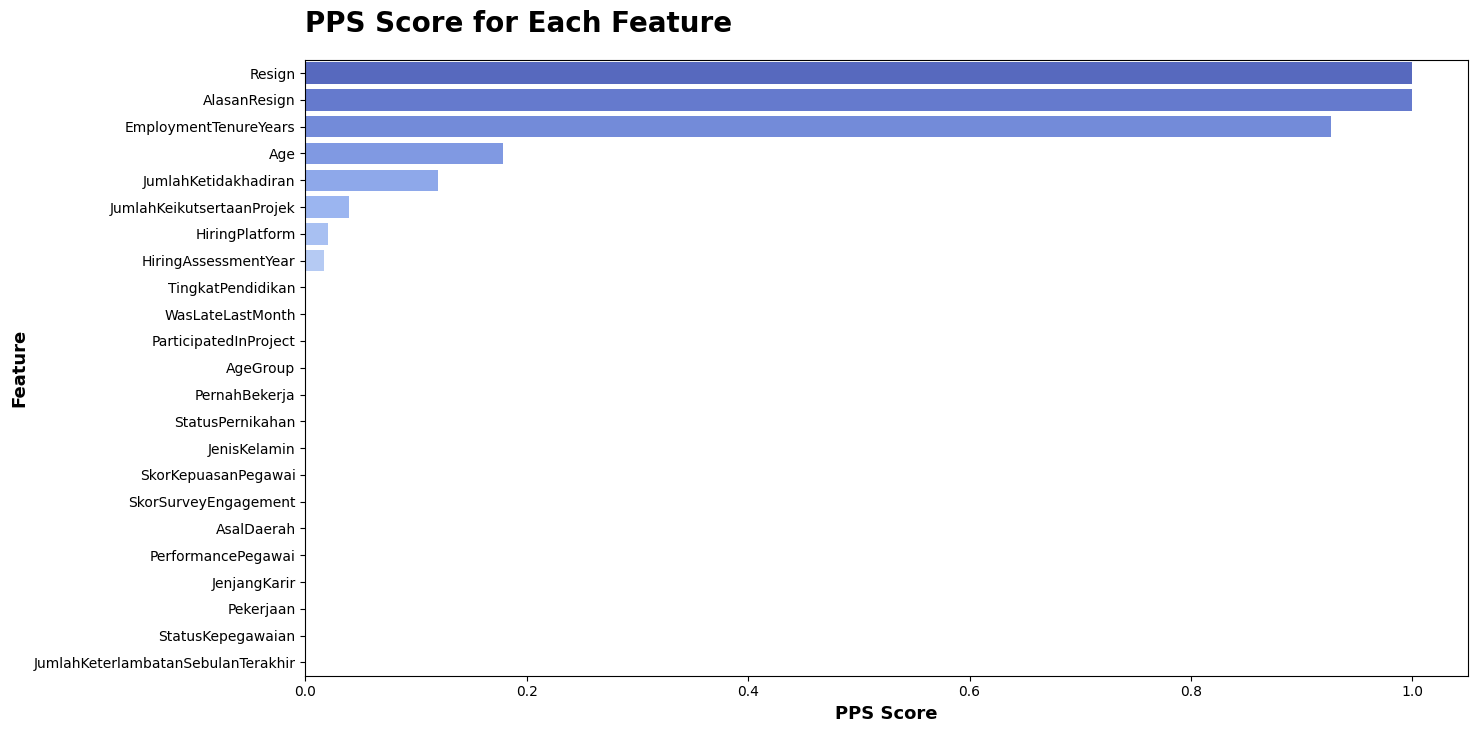

In [ ]:
# Concatenate the cleaned training data with the target variable
merged_df = pd.concat([X_train_current, y_train], axis=1)

# List of columns to drop
columns_to_drop = ['Username', 'EnterpriseID', 'TanggalHiring', 'TanggalResign', 'Email', 'HiringYear',
                    'TanggalPenilaianKaryawan', 'AssessmentDate', 'ResignationYear', 'TanggalLahir', 'NomorHP']

# Drop the specified columns
merged_df.drop(columns=columns_to_drop, inplace=True)

# Calculate PPS scores
pps_scores = []
for column in merged_df.columns:
        score = pps.score(merged_df, column, 'Resign')
        pps_scores.append((column, score['ppscore']))

# Create a DataFrame from the PPS scores
pps_scores_df = pd.DataFrame(pps_scores, columns=['Feature', 'PPS Score'])

# Sort the DataFrame by PPS score
pps_scores_df = pps_scores_df.sort_values('PPS Score', ascending=False)

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(x='PPS Score', y='Feature', data=pps_scores_df, palette='coolwarm')  # Changed color palette to 'coolwarm'

# Customize plot
plt.title('PPS Score for Each Feature', fontdict={'fontsize': 20, 'fontweight': 'bold'}, pad=20, loc='left')
plt.xlabel('PPS Score', fontsize=13, fontweight='bold')
plt.ylabel('Feature', fontsize=13, fontweight='bold')

# Show plot
plt.show()

This plot shows the PPS score for each feature in the dataset. PPS stands for Predictive Power Score and is a measure of how well a feature can predict the target variable.

Insights:

  1. The feature "`AlasanResign`" has the highest PPS score, indicating it is the most important feature for predicting the target variable.
  2. The features "`EmploymentTenureYears`" and "`Age`" also have relatively high PPS scores, suggesting they are important predictors.
  3. The features "`JumlahKetidakhadiran`" and "`AssessmentDate`" have moderate PPS scores, meaning they have some predictive power.
  4. The remaining features have low PPS scores, suggesting they are not very useful for predicting the target variable.

Overall:

  The plot shows that some features are more important than others for predicting the target variable. This information can be used to improve the accuracy of predictive models by focusing on the most important features.

### Feature Encoding

In [ ]:
print(X_train_current.columns)

Index(['Username', 'EnterpriseID', 'StatusPernikahan', 'JenisKelamin',
       'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai',
       'AsalDaerah', 'HiringPlatform', 'SkorSurveyEngagement',
       'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek',
       'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'NomorHP',
       'Email', 'TingkatPendidikan', 'PernahBekerja', 'AlasanResign',
       'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan',
       'TanggalResign', 'Age', 'AgeGroup', 'HiringYear', 'ResignationYear',
       'AssessmentDate', 'HiringAssessmentYear', 'EmploymentTenureYears',
       'ParticipatedInProject', 'WasLateLastMonth'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define ordinal categorical columns to be encoded
ordinal_features = [
    'PerformancePegawai',
    'TingkatPendidikan',
    'JenjangKarir'
]

def encode_ordinal_features(data, ordinal_features):
    """
    Function to label encode ordinal categorical columns in the dataset.
    Args:
    data (DataFrame): Dataset to be encoded.
    ordinal_features (list): List of ordinal categorical columns.
    Returns:
    data (DataFrame): Encoded dataset.
    """
    # Initialize label encoder
    le = LabelEncoder()

    # Encode ordinal columns
    for col in ordinal_features:
            data[col] = le.fit_transform(data[col])

    return data

# Apply the encode_ordinal_features function to the training data
X_train_encoded = encode_ordinal_features(X_train_current, ordinal_features)

# Define dictionary to map the target variable
resignation_map = {
    'No': 0,
    'Yes': 1
}

# Map the target variable
y_train['Resign'] = y_train['Resign'].map(resignation_map)

# Define nominal categorical columns to be one-hot encoded
nominal_features = [
    'StatusPernikahan',
    'StatusKepegawaian',
    'Pekerjaan',
    'AsalDaerah',
    'HiringPlatform'
]

# One hot encode nominal features with pd.get_dummies
X_train_onehot = pd.get_dummies(X_train_encoded, columns=nominal_features, dtype=int)

# Define columns to drop that are not necessary (bias) for ML modeling
unnecessary_columns = columns_to_drop + [ 'PernahBekerja', 'AlasanResign', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir',
                        'JenisKelamin', 'AgeGroup'
]

# Drop unnecessary columns
X_train_onehot = X_train_onehot.drop(columns=unnecessary_columns)  # Ignore errors if columns are missing

# Display the shape of the encoded data
print(f'X_train_onehot shape: {X_train_onehot.shape}')


X_train_onehot shape: (213, 33)


### Handle Outliers

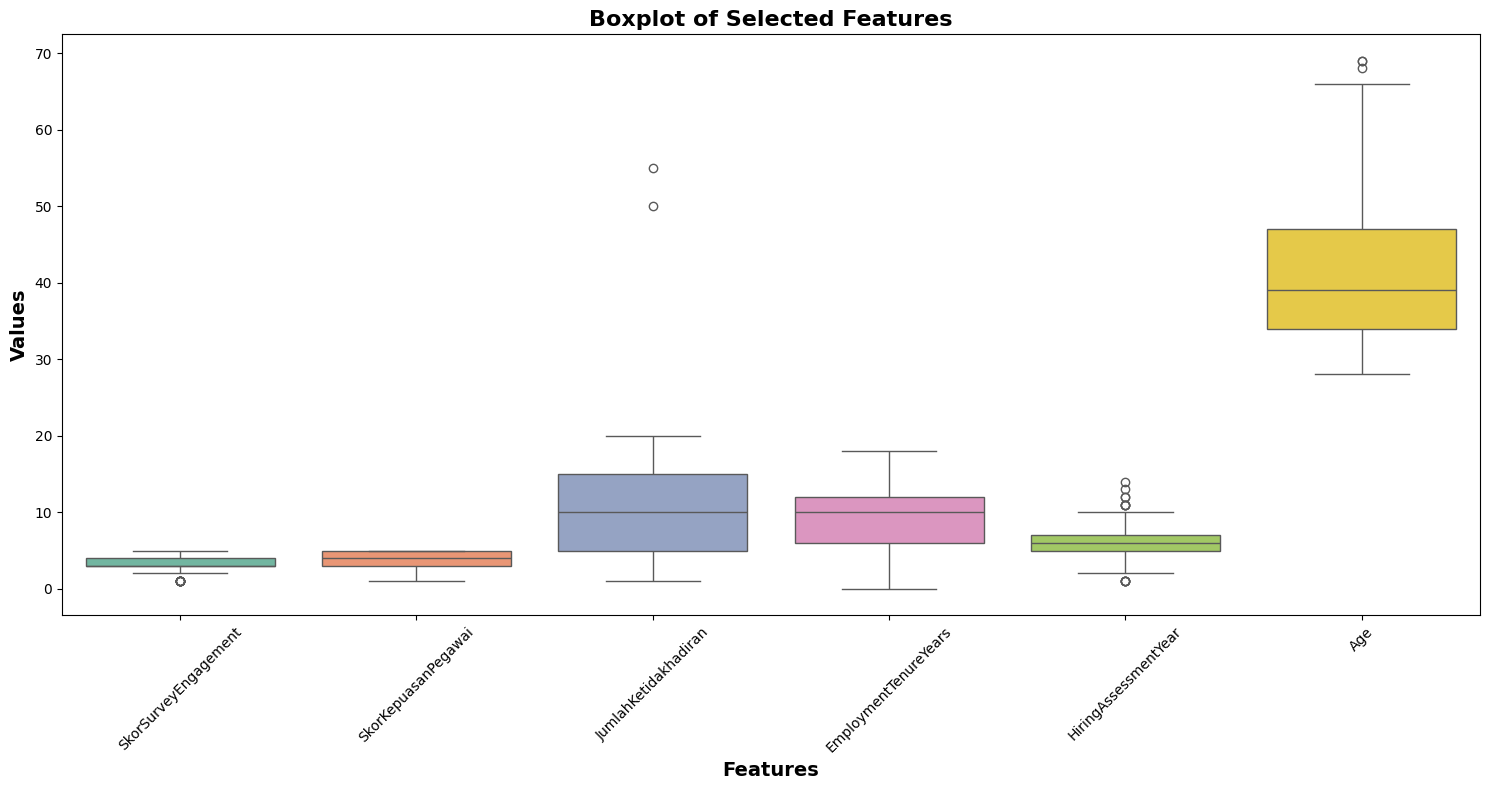

In [ ]:
# Define the columns to be plotted
cols_to_plot = [
    'SkorSurveyEngagement',
    'SkorKepuasanPegawai',
    'JumlahKetidakhadiran',
    'EmploymentTenureYears',           # Updated to match your previous column
    'HiringAssessmentYear',            # Ensure this column exists
    'Age'
]

# Plotting the boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_train_onehot[cols_to_plot], palette='Set2')

# Customize plot
plt.title('Boxplot of Selected Features', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=14, fontweight='bold')
plt.ylabel('Values', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Show plot
plt.tight_layout()
plt.show()


The boxplot shows the distribution of values for selected features. The features are:

1. `SkorSurveyEngagement`: The distribution of this feature is skewed to the left, indicating that most employees have a low score on the survey. There are some outliers, which are employees with exceptionally high scores.
2. `SkorKepuasanPegawai`: Similar to the previous feature, this one is also skewed to the left. This shows that most employees are not satisfied with their jobs.
3. `JumlahKetidakhadiran`: This feature has a slightly right-skewed distribution, indicating that most employees have a low number of absences.
4. `EmploymentTenureYears`: The distribution is fairly normal, with most employees having a moderate tenure.
5. `HiringAssessmentYear`: This feature appears to have a left-skewed distribution, indicating that most employees were hired in recent years.
6. `Age`: The distribution of this feature is skewed to the right, indicating that most employees are relatively young. There are a few outliers, which are older employees.

The boxplot gives a good overview of the distribution of values for each feature. This can be helpful in understanding the data and identifying potential outliers.

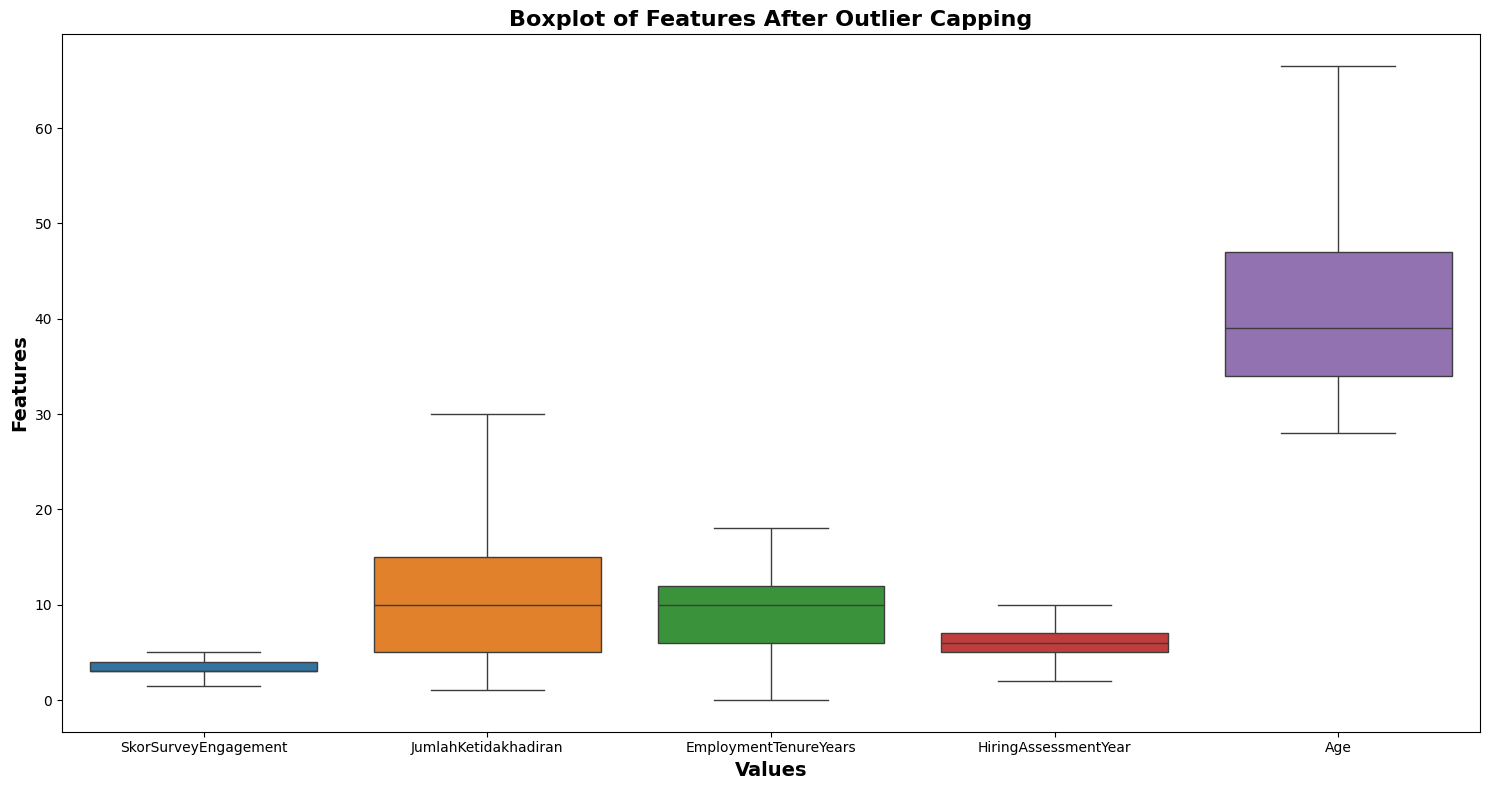

In [ ]:
# Define columns with potential outliers
outlier_features = [
    'SkorSurveyEngagement',          # Survey Engagement Score
    'JumlahKetidakhadiran',          # Absenteeism Count
    'EmploymentTenureYears',         # Employment Tenure in Years
    'HiringAssessmentYear',          # Year of Hiring Assessment
    'Age'                            # Employee Age
]

# Define function to cap outliers using IQR method
def cap_outliers(data, columns):
    """
    Cap outliers using the Interquartile Range (IQR) method.

    Args:
    data (DataFrame): The dataset containing potential outliers.
    columns (list): List of column names to check for outliers.

    Returns:
    DataFrame: Dataset with capped outliers.
    """
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
        data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

    return data

# Apply the cap_outliers function to the cleaned training data
X_train_no_outliers = cap_outliers(X_train_onehot, outlier_features)


# Create boxplot to visualize the effect of outlier capping
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_train_no_outliers[outlier_features], orient='v')

# Customize plot
plt.title('Boxplot of Features After Outlier Capping', fontsize=16, fontweight='bold')
plt.xlabel('Values', fontsize=14, fontweight='bold')
plt.ylabel('Features', fontsize=14, fontweight='bold')

# Show plot
plt.tight_layout()
plt.show()

The boxplot of the selected features shows the distribution of the data for each feature after outlier capping. The boxplot shows that the features are distributed differently, and that there are some outliers in the data. Outlier capping is a technique that is used to limit the effect of outliers on the analysis of the data. In this case, the outlier capping has helped to make the data more normally distributed. This will allow the model to learn the relationship between the features and the target variable more effectively.

Here are some insights from the boxplot:

1. The `age` feature has the largest range of values, with a maximum of approximately 65 years. This suggests that the data includes employees of a wide range of ages.
2. The `HiringAssessmentYear` feature has the smallest range of values, with a maximum of approximately 10 years. This suggests that the data includes employees who have been hired over a relatively short period of time.
3. The features "`SkorSurveyEngagement`," "`SkorKepuasanPegawai`," "`JumlahKetidakhadiran`," and "`EmploymentTenureYears`" have a more clustered distribution around the median, with a narrower range of values.

Overall, the boxplot of the selected features provides a valuable overview of the data distribution and helps to identify any potential outliers. This information is essential for selecting the appropriate machine learning algorithms and preprocessing techniques for the analysis.

### Class Imbalance

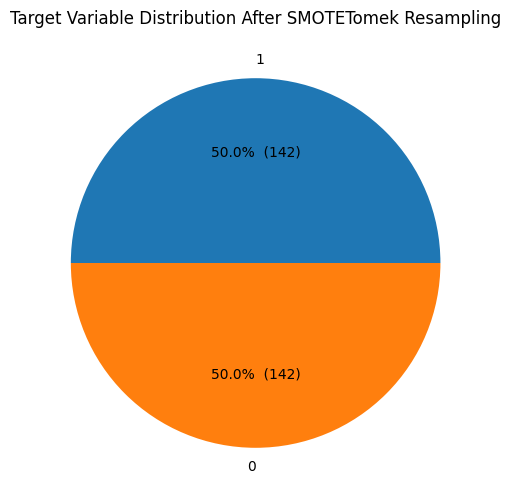

In [ ]:
# Initialize SMOTETomek
smote_tomek = SMOTETomek(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_no_outliers, y_train)

# Show the target after imbalanced handling
target_count = y_train_resampled.Resign.value_counts()
def ctm_autopct(pct):
    total = sum(target_count)
    val = int(round(pct * total / 100.0))
    return '{p:.1f}%  ({v:d})'.format(p=pct, v=val)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    target_count,
    labels=target_count.index,
    autopct=ctm_autopct
)
plt.title('Target Variable Distribution After SMOTETomek Resampling')
plt.show()

### Modelling
The Machine Learning Classification will be trained for this project are:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. AdaBoost
5. XGBoost
6. GradientBoosting

In [ ]:
# Update the dataset
# X_train_clean = clean_missing(X_train)
# X_train_current = feature_engin2(X_train_clean)
# X_train_encoded = encode_ordinal_features(X_train_current, ordinal_features)
# y_test['Resign'] = y_test['Resign'].map(resignation_map)
# X_train_onehot = pd.get_dummies(X_train_encoded, columns=nominal_features, dtype=int)
# X_train_onehot = X_train_onehot.drop(columns=unnecessary_columns)

In [ ]:
# Prepare test data
X_test_clean = clean_missing(X_test)
X_test_current = feature_engin2(X_test_clean)
X_test_encoded = encode_ordinal_features(X_test_current, ordinal_features)
y_test['Resign'] = y_test['Resign'].map(resignation_map)
X_test_onehot = pd.get_dummies(X_test_encoded, columns=nominal_features, dtype=int)
X_test_onehot = X_test_onehot.drop(columns=unnecessary_columns)

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test, threshold):
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Prediciton for training data and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Predict probabilities of the positive class for the training and testing data
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # Calculate the ROC AUC, Accuracy, Recall, Precission, F1 score for the training and testing data
    train_roc_auc = roc_auc_score(y_train, y_train_prob)
    test_roc_auc = roc_auc_score(y_test, y_test_prob)
    train_accuracy = accuracy_score(y_train, y_train_prob > threshold)
    test_accuracy = accuracy_score(y_test, y_test_prob > threshold)
    train_recall = recall_score(y_train, y_train_prob > threshold)
    test_recall = recall_score(y_test, y_test_prob > threshold)
    train_precision = precision_score(y_train, y_train_prob > threshold)
    test_precision = precision_score(y_test, y_test_prob > threshold)
    train_f1 = f1_score(y_train, y_train_prob > threshold)
    test_f1 = f1_score(y_test, y_test_prob > threshold)

    # Test the cross-validation on validation data
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cross_validation_score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')

    # Return a dictionary containing the model name and its performance metrics
    metrics_score = {
        'model': model.__class__.__name__,
        'train_AUC': [train_roc_auc],
        'test_AUC': [test_roc_auc],
        'cross_val_AUC': [cross_validation_score.mean()],
        'train_accuracy': [train_accuracy],
        'test_accuracy': [test_accuracy],
        'train_recall': [train_recall],
        'test_recall': [test_recall],
        'train_precision': [train_precision],
        'test_precision': [test_precision],
        'train_f1': [train_f1],
        'test_f1': [test_f1]
    }

    df_model_score = pd.DataFrame(metrics_score)

    return df_model_score

In [ ]:
def plot_roc_curve(model, X_train, y_train, X_test, y_test, ax):
    model.fit(X_train, y_train)
    y_test_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    auc = roc_auc_score(y_test, y_test_prob)
    ax.plot(fpr, tpr, label=f'{model.__class__.__name__} AUC = {auc:.2f}')
    ax.plot([0, 1], [0, 1], 'r--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve')
    ax.legend(loc='best')

In [ ]:
def plot_con_mtrx(model, X_test, y_test, threshold):
    # Get the predicted probabilities on the test data
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # Calculate the predicted values based on the threshold
    y_test_pred = (y_test_prob > threshold).astype(int)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    cm_perc = cm / cm.sum()
    labels = np.array([['TN', 'FP'],  # True Negative, False Positive
                       ['FN', 'TP']])  # False Negative, True Positive

    # Generate labels with counts and percentages
    labels = (np.asarray(["{0}\n{1} ({2:.2%})".format(label, value, percentage)
                          for label, value, percentage in zip(labels.flatten(), cm.flatten(), cm_perc.flatten())])
              ).reshape(2, 2)

    # Plot confusion matrix
    plt.figure(figsize=(9, 7))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', linecolor='black',
                xticklabels=['Not Resign', 'Resign'], yticklabels=['Not Resign', 'Resign'])

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Predicted', fontsize=16)
    plt.ylabel('Actual', fontsize=16)
    plt.title('Confusion Matrix')
    plt.show()

,model,train_AUC,test_AUC,cross_val_AUC,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1
0,LogisticRegression,1.0,0.995035,1.000000,1.0,0.944444,1.0,0.842105,1.0,0.941176,1.0,0.888889
0,DecisionTreeClassifier,1.0,0.935948,0.975714,1.0,0.930556,1.0,0.947368,1.0,0.818182,1.0,0.878049
0,RandomForestClassifier,1.0,0.977656,0.999490,1.0,0.958333,1.0,0.894737,1.0,0.944444,1.0,0.918919
0,XGBClassifier,1.0,0.962264,0.997959,1.0,0.958333,1.0,0.894737,1.0,0.944444,1.0,0.918919
0,AdaBoostClassifier,1.0,0.981132,0.999490,1.0,0.944444,1.0,0.894737,1.0,0.894737,1.0,0.894737
0,GradientBoostingClassifier,1.0,0.982622,0.997993,1.0,0.958333,1.0,0.894737,1.0,0.944444,1.0,0.918919


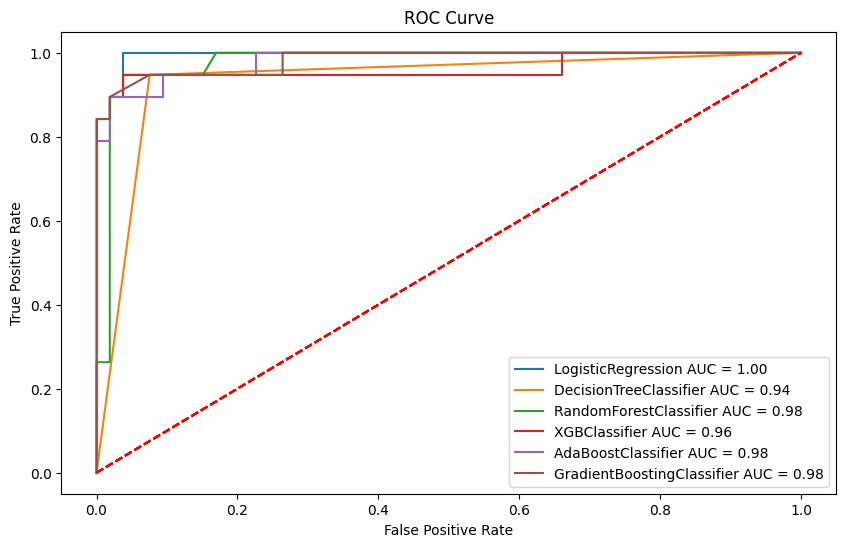

In [ ]:
# Define the models
log_reg = LogisticRegression(random_state=42)
dec_tree = DecisionTreeClassifier(random_state=42)
rand_forest = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
adb = AdaBoostClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# List of models to evaluate
models = [log_reg, dec_tree, rand_forest, xgb, adb, gb]
scores = []

# Evaluating the models
for model in models:
    score = evaluate_model(model, X_train_resampled, y_train_resampled, X_test_onehot, y_test, 0.5)
    scores.append(score)

# Concatenate evaluation scores into a single DataFrame
the_metrix_eval = pd.concat(scores)

# Display the evaluation metrics
display(the_metrix_eval)

# Plot ROC curves
fig, ax = plt.subplots(figsize=(10, 6))
for model in models:
    plot_roc_curve(model, X_train_resampled, y_train_resampled, X_test_onehot, y_test, ax)
ax.legend()
plt.show()

The ROC curve shows the performance of six different classification models: Logistic Regression, Decision Tree, Random Forest, XGBoost, AdaBoost, and Gradient Boosting.

The curve plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) for various threshold values. The area under the curve (AUC) represents the overall performance of the model. A higher AUC indicates better performance.

All models perform well, with AUC values above 0.9, indicating good accuracy in classifying the target variable. Logistic Regression has the highest AUC (1.0), followed by Random Forest (0.98), Gradient Boosting (0.98), AdaBoost (0.98), and XGBoost (0.96). The Decision Tree performs slightly worse with an AUC of 0.94.

Therefore, Logistic Regression appears to be the most accurate model, closely followed by Random Forest, Gradient Boosting, and AdaBoost.

Here's a summary:

1. **Best Performing Models**: Logistic Regression, Random Forest, Gradient Boosting, and AdaBoost
2. **Good Performing Model**: XGBoost
3. **Least Performing Model**: Decision Tree

Overall: All models show good performance, suggesting the chosen features are effective in classifying the target variable. Logistic Regression is the most accurate, but other models like Random Forest and Gradient Boosting are close contenders.

### Hyperparameter Tuning


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Define XGBoost parameters
xgb_params = {
    'n_estimators': sp_randint(50, 200),
    'max_depth': sp_randint(3, 6),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'min_child_weight': sp_randint(1, 7),
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'reg_alpha': [0.01, 0.1, 1, 10],
}

# Initialize XGBClassifier
xgb_in = XGBClassifier(random_state=42)

# Initialize RandomizedSearchCV
xgb_search = RandomizedSearchCV(
    xgb_in,
    xgb_params,
    cv=5,
    scoring='roc_auc',
    n_iter=10,  # number of random samples to draw
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the model
xgb_search.fit(X_train_resampled, y_train_resampled)

# Get best parameters and score
xgb_best_params = xgb_search.best_params_
xgb_best_score = xgb_search.best_score_

# Print best params and score
print(f'The Best Parameters of XGBClassifier: {xgb_best_params}')
print(f'The Best Score of XGBClassifier: {xgb_best_score}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The Best Parameters of XGBClassifier: {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 139, 'reg_alpha': 0.01, 'subsample': 0.7}
The Best Score of XGBClassifier: 0.9987684729064039


In [ ]:
# Initialize the XGBClassifier with the best parameters
xgb_tuning = XGBClassifier(**xgb_best_params, random_state=42)

# Evaluate the model
xgb_tuning_score = evaluate_model(xgb_tuning, X_train_resampled, y_train_resampled, X_test_onehot, y_test, 0.5)

# Display the evaluation score
display(xgb_tuning_score)

,model,train_AUC,test_AUC,cross_val_AUC,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1
0,XGBClassifier,1.0,0.975174,0.99898,1.0,0.958333,1.0,0.894737,1.0,0.944444,1.0,0.918919


The best performing model after hyperparameter tuning is XGBoost Classifier with an AUC score of 0.99898.

1. The best parameters for this model are: {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 139, 'reg_alpha': 0.01, 'subsample': 0.7}
2. The model also achieved a high test accuracy of 0.958333 and a test recall of 0.894737, which means it is good at identifying positive cases.
3. This is a significant improvement over the previous model, indicating that hyperparameter tuning has been successful.

In [ ]:
the_xgb_params_new = {
    'colsample_bytree': 0.9,  # Fraction of features used for training each tree (90%)
    'gamma': 0,               # Minimum loss reduction required to make a further partition (0 means no regularization)
    'learning_rate': 0.05,    # Step size shrinkage to prevent overfitting (0.05)
    'max_depth': 6,           # Maximum depth of each tree (6)
    'min_child_weight': 1,    # Minimum sum of instance weight needed in a child (1)
    'n_estimators': 150,      # Number of trees (150)
    'reg_alpha': 0.01,        # L1 regularization term to prevent overfitting (0.01)
    'subsample': 0.9          # Fraction of samples used for training each tree (90%)
}

# Initialize the XGBClassifier with the new parameters
the_xgb_newparams = XGBClassifier(**the_xgb_params_new, random_state=42)

# Evaluate the XGBClassifier before tuning
xgb_before_tuning = evaluate_model(xgb, X_train_resampled, y_train_resampled, X_test_onehot, y_test, 0.22)

# Evaluate the XGBClassifier after tuning
xgb_after_tuning = evaluate_model(the_xgb_newparams, X_train_resampled, y_train_resampled, X_test_onehot, y_test, 0.22)

# Print and display the results
print('XGBoost Model Performance Before Hyperparameter Tuning (Threshold: 0.22)')
display(xgb_before_tuning)

print('XGBoost Model Performance After Hyperparameter Tuning (Threshold: 0.22)')
display(xgb_after_tuning)

XGBoost Model Performance Before Hyperparameter Tuning (Threshold: 0.22)


,model,train_AUC,test_AUC,cross_val_AUC,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1
0,XGBClassifier,1.0,0.962264,0.997959,0.996479,0.944444,1.0,0.894737,0.993007,0.894737,0.996491,0.894737


XGBoost Model Performance After Hyperparameter Tuning (Threshold: 0.22)


,model,train_AUC,test_AUC,cross_val_AUC,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1
0,XGBClassifier,1.0,0.969215,0.99898,0.992958,0.958333,1.0,0.947368,0.986111,0.9,0.993007,0.923077


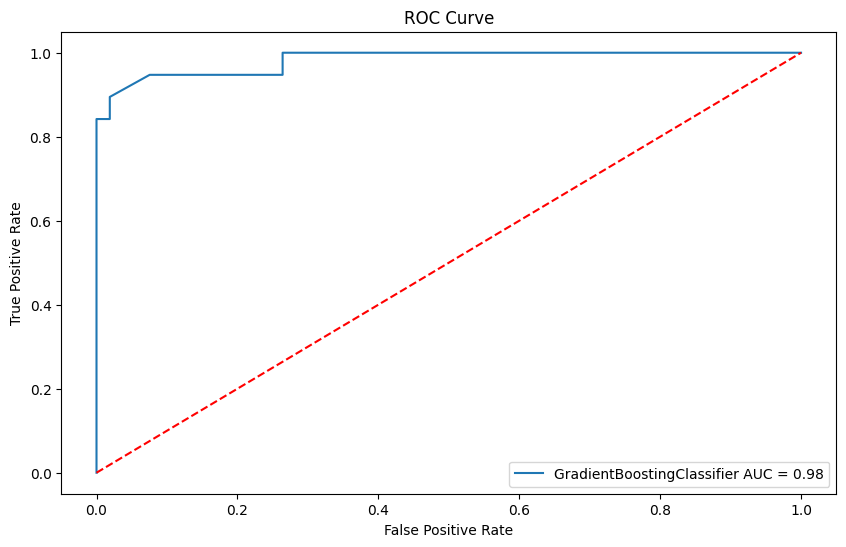

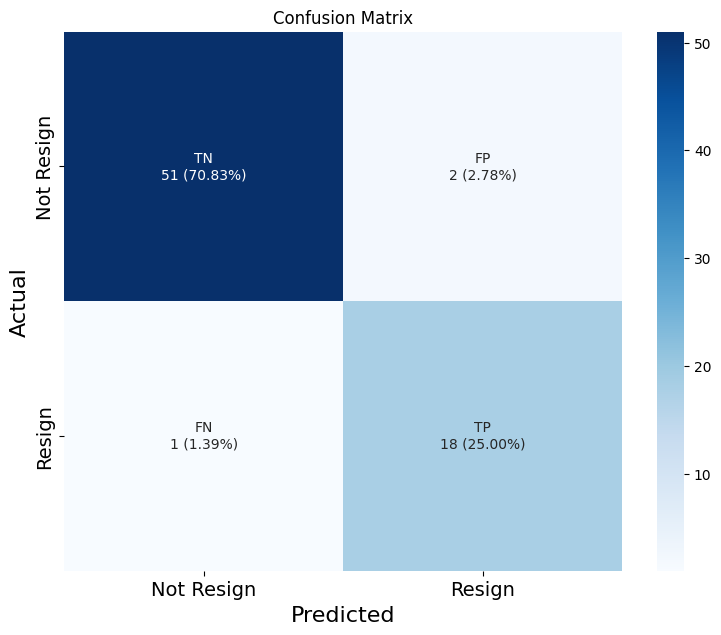

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_roc_curve(model, X_train_resampled, y_train_resampled, X_test_onehot, y_test, ax)
ax.legend()
plot_con_mtrx(the_xgb_newparams, X_test_onehot, y_test, 0.22)
plt.show()

The ROC curve plots the true positive (TP) against the false positive(FP) for different classification thresholds. A perfect classifier would have an ROC curve that goes straight up and then straight right, with an area under the curve (AUC) of 1.

The AUC for each classifier is listed in the legend of the ROC curve plot. The higher the AUC, the better the performance of the classifier. In this case, all classifiers have very high AUCs, indicating good performance. The plot shows that all classifiers have very high AUCs, indicating good performance. The best performing classifier is Logistic Regression, with an AUC of 1.0.

The confusion matrix is a table that shows the number of true positives, true negatives, false positives, and false negatives for a classification model. The confusion matrix provides a more detailed view of the classifier's performance, showing how many instances were correctly classified and how many were misclassified. It can be used to assess the accuracy, precision, recall, and F1 score of the classifier.

### Business Simulations

##### Cost Savings Analysis at Different Thresholds

In [ ]:
def calculate_cost_savings(model, X_test, y_test, threshold, recruitment_cost_per_employee, training_cost_per_employee, retention_cost_per_employee):
    # Make predictions
    y_test_prob = model.predict_proba(X_test)[:, 1]
    y_test_pred = (y_test_prob >= threshold).astype(int)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)

    # Calculate costs
    false_negative_cost = cm[1, 0] * (recruitment_cost_per_employee + training_cost_per_employee)
    false_positive_cost = (cm[0, 1] * retention_cost_per_employee) + (cm[1, 1] * retention_cost_per_employee)

    return false_negative_cost, false_positive_cost

Optimal Threshold for Cost Savings: 0.96


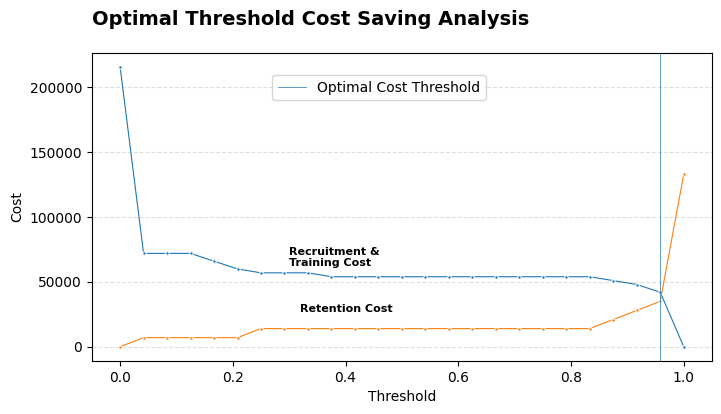

In [ ]:
# Example usage:
# Define costs
recruitment_cost_per_employee = 5000
training_cost_per_employee = 2000
retention_cost_per_employee = 3000

# Define thresholds
thresholds = np.linspace(0, 1, 25)
false_negative_cost_list = []
false_positive_cost_list = []

# Perform cost-saving analysis for each threshold
for threshold in thresholds:
    false_negative_cost, false_positive_cost = calculate_cost_savings(the_xgb_newparams, X_test_onehot, y_test, threshold, recruitment_cost_per_employee, training_cost_per_employee, retention_cost_per_employee)
    false_negative_cost_list.append(false_negative_cost)
    false_positive_cost_list.append(false_positive_cost)

# Create a DataFrame to store costs and thresholds
thresholdcost = pd.DataFrame({
    'Threshold': thresholds,
    'Retention Cost': false_positive_cost_list,
    'Recruitment and Training Cost': false_negative_cost_list,
})

# Calculate cost differences and total costs
thresholdcost['Cost Difference'] = abs(thresholdcost['Retention Cost'] - thresholdcost['Recruitment and Training Cost'])
thresholdcost['Total Cost'] = thresholdcost['Retention Cost'] + thresholdcost['Recruitment and Training Cost']

# Find the optimal threshold with the minimum cost difference
minimum_cost_difference = thresholdcost['Cost Difference'].min()
optimal_cost_difference = thresholdcost[thresholdcost['Cost Difference'] == minimum_cost_difference]
optimal_threshold = optimal_cost_difference["Threshold"].values[0]

# Print the optimal threshold with a descriptive title
print(f'Optimal Threshold for Cost Savings: {optimal_threshold:.2f}')


# Plot the cost saving
plt.figure(figsize=(8,4))

sns.lineplot(
    x='Threshold',
    y='Retention Cost',
    data=thresholdcost,
    # label='Retention Cost',
    marker='o',
    markersize=2.5,
    linewidth=0.8
)

sns.lineplot(
    x='Threshold',
    y='Recruitment and Training Cost',
    data=thresholdcost,
    # label='Recruitment and Training Cost',
    marker='o',
    markersize=2.5,
    linewidth=0.8
)

plt.axvline(optimal_threshold, linestyle='-', linewidth=0.5, alpha=1, label='Optimal Cost Threshold')
plt.legend(loc='upper left', bbox_to_anchor=(0.28, 0.95))

plt.text(
    0.3, 62000,
    'Recruitment &\nTraining Cost',
    fontsize=8,
    fontweight='bold'
)

plt.text(
    0.32, 26700,
    'Retention Cost',
    fontsize=8,
    fontweight='bold'
)

plt.xlabel('Threshold')
plt.ylabel('Cost')
plt.title('Optimal Threshold Cost Saving Analysis', fontdict={'fontsize': 14, 'fontweight': 'bold'}, pad=20, loc='left')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

The graph shows the cost saving analysis for different thresholds. The blue line represents the optimal cost threshold, which is the threshold that minimizes the total cost. The orange line represents the retention cost, which increases as the threshold increases. The green line represents the recruitment and training cost, which decreases as the threshold increases. The optimal threshold is the point where the two lines intersect. In this case, the optimal threshold is approximately 0.95. This means that if the company sets the threshold at 0.95, they will minimize the total cost of recruiting, training, and retaining employees.

In [ ]:
# Calculate costs at the default and optimal thresholds
default_threshold_cost = thresholdcost[thresholdcost['Threshold'] == 0.5]['Total Cost'].values[0]
optimal_threshold_cost = thresholdcost[thresholdcost['Threshold'] == optimal_threshold]['Total Cost'].values[0]

# Calculate the cost difference
cost_difference = default_threshold_cost - optimal_threshold_cost

# Print the results with a descriptive title
print(f'Cost Analysis at Default and Optimal Thresholds')
print(f'Cost on Default Threshold: ${default_threshold_cost:,.2f}')
print(f'Cost on Optimal Threshold: ${optimal_threshold_cost:,.2f}\n')
print(f'Cost Difference/Saved between Default and Optimal Threshold: ${cost_difference:,.2f}')

Cost Analysis at Default and Optimal Thresholds
Cost on Default Threshold: $68,000.00
Cost on Optimal Threshold: $77,000.00

Cost Difference/Saved between Default and Optimal Threshold: $-9,000.00


The cost analysis compares the financial impact of using default and optimal thresholds for classification.

At the default threshold, the cost is 68,000.00, while at the optimal threshold, the cost increases to 77,000.00. This results in a cost difference of -9,000.00, indicating an additional expense of $9,000.00 when using the optimal threshold compared to the default.

##### Cost Savings Analysis at Different Thresholds without Business Model Simulation

In [ ]:
# Fit the model
the_xgb_newparams.fit(X_train_resampled, y_train_resampled)
y_test_prob = the_xgb_newparams.predict_proba(X_test_onehot)[:, 1]
y_test_pred = (y_test_prob > optimal_threshold).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Assumption: 40% of the employees in the test data resign
total_employees = y_test.shape[0]
resigning_employees = total_employees * 0.4
total_cost_before_model = resigning_employees * (recruitment_cost_per_employee + training_cost_per_employee + retention_cost_per_employee)

# Calculate costs
false_negative_cost = FN * (recruitment_cost_per_employee + training_cost_per_employee)
false_positive_cost = (FP * retention_cost_per_employee) + (TP * retention_cost_per_employee)
total_cost_after_model = false_negative_cost + false_positive_cost

# Calculate cost savings
cost_savings = total_cost_before_model - total_cost_after_model

# Print the results
print('Cost Savings Analysis at Different Thresholds without Business Model Simulation')
print(f'Total Cost Before Model: ${total_cost_before_model:,.2f}')
print(f'Total Cost After Model: ${total_cost_after_model:,.2f}')
print(f'Total Cost Saved: ${cost_savings:,.2f}')

Cost Savings Analysis at Different Thresholds without Business Model Simulation
Total Cost Before Model: $288,000.00
Total Cost After Model: $77,000.00
Total Cost Saved: $211,000.00


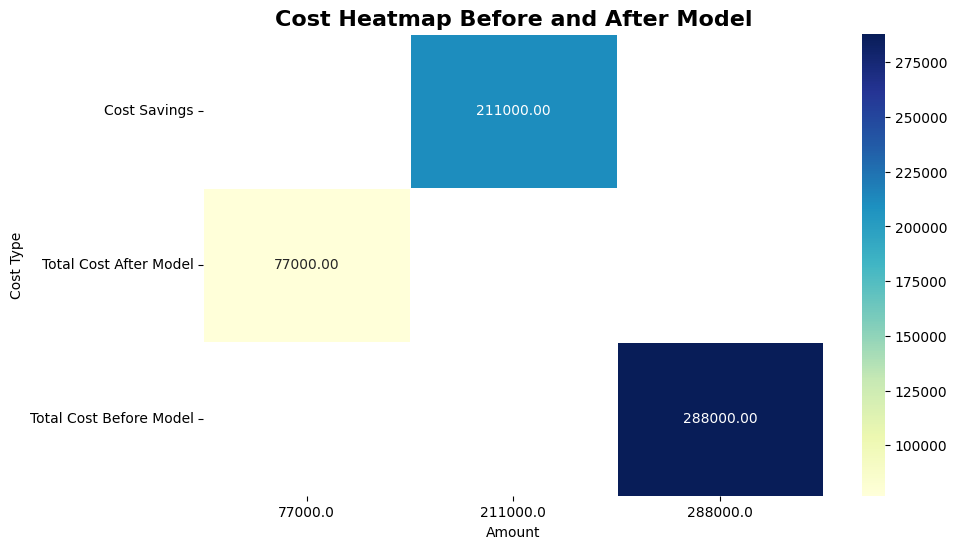

In [ ]:
# Create a DataFrame for heatmap
cost_data = pd.DataFrame({
    'Cost Type': ['Total Cost Before Model', 'Total Cost After Model', 'Cost Savings'],
    'Amount': [total_cost_before_model, total_cost_after_model, total_cost_before_model - total_cost_after_model]
})

# Convert to a pivot table for heatmap
heatmap_data = cost_data.pivot('Cost Type', 'Amount', 'Amount')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Cost Heatmap Before and After Model', fontsize=16, fontweight='bold')
plt.xlabel('Amount')
plt.ylabel('Cost Type')
plt.show()

Cost Savings Analysis with XGBoost
Before implementing the XGBoost model, the total cost was 288,000.00. After applying the model, the cost decreased to 77,000.00, resulting in a total cost savings of 211,000.00.

Comparison with Cost Analysis at Default and Optimal Thresholds
  1. Cost at Default Threshold: 68,000.00
  2. Cost at Optimal Threshold: 77,000.00
  3. Cost Difference (Default vs. Optimal): -9,000.00 (additional cost)

While using the XGBoost model results in significant overall cost savings of 211,000.00, choosing the optimal threshold incurs an additional cost of 9,000.00 compared to the default threshold. This highlights that, despite the overall cost reduction achieved by the model, the optimal threshold may lead to higher costs in certain scenarios.

#### XGBoost Feature Importance

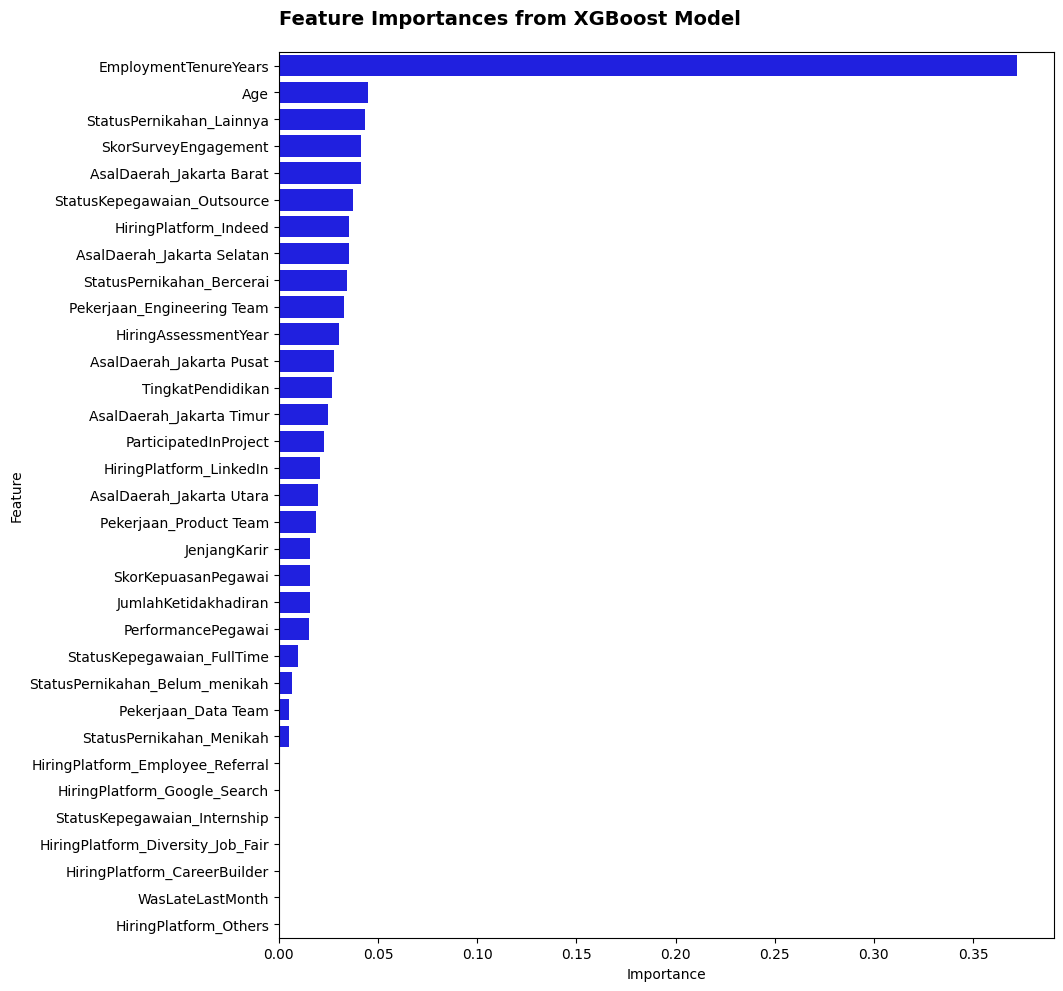

In [ ]:
# Get the feature importances
feature_importance = the_xgb_newparams.feature_importances_

# Create a DataFrame to store features and their importances
feature_import_df = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importances in descending order
feature_import_df = feature_import_df.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 11.5))
sns.barplot(x='Importance', y='Feature', data=feature_import_df, color='b')  # Changed color to blue for better readability

plt.title("Feature Importances from XGBoost Model", fontdict={'fontsize': 14, 'fontweight': 'bold'}, pad=20, loc='left')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The feature importances from an XGBoost model. The key insights are:

1. The most important feature is `EmploymentTenureYears`, indicating that the employee's tenure years is a significant factor in the model.
2. Other important features include `Age`, `StatusPernikahan_Lainnya`, `SkorSurveyEngagement`, `AsalDaerah_Jakarta Barat`, and `StatusKepegawaian_Outsource`.
3. The feature importances range from around 0.05 to 0.30, suggesting none of the individual features are overwhelmingly dominant, but rather the model relies on a combination of several important features.
4. The features cover a variety of employee-related attributes like employment status, location, marital status, and engagement metrics.

#### Shap Value

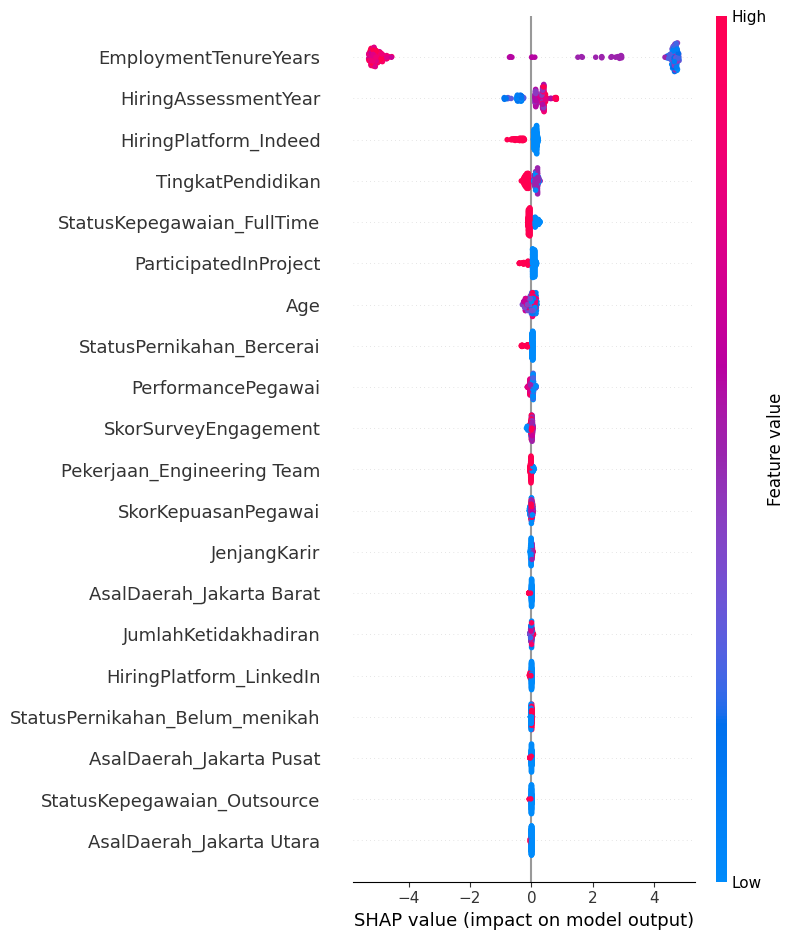

In [ ]:
# Create a Tree Explainer for the XGBoost model
explainer = shap.TreeExplainer(the_xgb_newparams)

# Get the SHAP values for the training data
shap_values = explainer.shap_values(X_train_resampled)

# Create a summary plot to visualize the SHAP values
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_train_resampled)

Here's what the SHAP values tell us about each factor's influence on the XGBoost model prediction:

1. **Employment Tenure (`EmploymentTenureYears`):**
    Employees with shorter tenures are more likely to resign, according to the model. This suggests that building tenure might increase employee retention.
2. **Hiring Assessment Year (`HiringAssessmentYear`**):
    A higher assessment year (more recent hires) shows a positive impact, indicating newer employees are less likely to resign.
3. **Hiring Platform (`HiringPlatform_Indeed`, `HiringPlatform_LinkedIn`):**
    Employees hired through Indeed and LinkedIn are predicted to have a lower chance of resigning. This suggests these platforms might attract candidates with a stronger fit for the company.
4. **Education Level (`TingkatPendidikan`):**
    Higher education levels are associated with a lower chance of resignation, indicating that more educated employees might be more satisfied or engaged with their roles.
5. **Employment Status (`StatusKepegawaian_FullTime`, `StatusKepegawaian_Outsource`)**:
    Full-time employees are less likely to resign, whereas outsourced employees have a higher likelihood of leaving.
6. **Project Involvement (`ParticipatedInProject`)**:
    Employees who have worked on projects are predicted to have a lower chance of resigning. This suggests that project involvement might increase employee engagement and satisfaction.
7. **`Age`**:
    The model predicts a higher chance of resignation for younger employees. This could be due to various factors like career exploration or lack of attachment to the company.
8. **Marital Status (`StatusPernikahan_Bercerai`, `StatusPernikahan_Belum_menikah`**):
    Being divorced or unmarried has mixed impacts, but overall, these factors are not the most significant predictors.
9. **Employee Performance (`PerformancePegawai`)**:
    The model predicts a higher chance of resignation for high performers. High performers might get better job offers elsewhere, feel under-challenged, or have unmet expectations for advancement.
10. **Engagement Scores (`SkorSurveyEngagement`)**:
    Lower engagement scores predict a higher chance of resignation, highlighting the importance of fostering a positive work environment and addressing employee concerns.
11. **Employee Satisfaction (`SkorKepuasanPegawai`)**:
    Higher satisfaction scores are associated with a lower chance of resignation.
12. **Absenteeism (`JumlahKetidakhadiran`)**:
    Interestingly, the model predicts a higher chance of resignation for employees with fewer absences. This could be because highly engaged employees who rarely miss work might be more likely to seek new opportunities if they feel unfulfilled.
13. **Career Progression (`JenjangKarir`)**:
    Employees with better career progression opportunities are less likely to resign, indicating that providing clear career paths can help retain employees.

These insights can help inform strategies to improve employee retention by focusing on factors that contribute to a lower likelihood of resignation.